# 개요

- 출처
  - 원본 데이터 셋
    - [Paris Housing Price Prediction](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)
  - 경진 대회 데이터 셋
    - [Paris Housing Price](https://www.kaggle.com/competitions/playground-series-s3e6/overview) 
- 내용 : 교육 목적, 실습 및 필요한 지식 습득을 위한  파리의 가상 집값 데이터에서 생성된 데이터 셋
- 평가지표 : RMSE 
- 타임라인 : 2023.2.7 ~ 2023.2.20

## 데이터 준비 및 확인

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/모듈_프로젝트_2/ep.6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

In [99]:
origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 17), (15154, 16), (15154, 1))

In [100]:
print(origin.columns)
print(train.columns)
print(test.columns)
print(submission.columns)
# price 변수를 제외하고 컬럼명 동일

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom'],
      dtype='object')
Index(['price'], dtype='object')


```
< 각 속성 확인 >
'id', : 고유 ID -> 확인 결과 id 컬럼은 인덱스정도 의미를 가진다 ( 컬럼 제거 가능 )
'squareMeters', : 방 면적 넓이 ( 연속형 )
'numberOfRooms', : 방 개수 ( 연속형 )
'hasYard', : 마당 존재 여부  ( 이진형 : 0,1 )
'hasPool', : 수영장 존재 여부 ( 이진형 : 0,1 )
'floors', : 층 수 ( 이산형 )
'cityCode', : 건물 구별 고유 코드 
'cityPartRange', : 지역구로 추정 ( 범주형 : 1 ~ 10 )
'numPrevOwners', : 이전 집 소유자 거친 횟수 ( 이산형 )
'made', : 제작연도 ( 범주형 )
'isNewBuilt',: 리빌딩 여부 ( 이진형 : 0,1 )
'hasStormProtector', : 태풍 보호기 설치 여부 ( 이진형 : 0,1 )
'basement', : 지하실 면적 넓이 (연속형)
'attic', : 다락방 면적 넓이 (연속형)
'garage', : 주차장 크기 (연속형)
'hasStorageRoom', : 창고 여부 ( 이진형 : 0,1 )
'hasGuestRoom', : 게스트 룸 개수 ( 이산형 )
'price' : 종속변수(Target), 시세 예측값
```

In [101]:
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

In [103]:
test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
id,,,,,,,,,,,,,,,,
22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10


In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15154 entries, 22730 to 37883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       15154 non-null  int64
 1   numberOfRooms      15154 non-null  int64
 2   hasYard            15154 non-null  int64
 3   hasPool            15154 non-null  int64
 4   floors             15154 non-null  int64
 5   cityCode           15154 non-null  int64
 6   cityPartRange      15154 non-null  int64
 7   numPrevOwners      15154 non-null  int64
 8   made               15154 non-null  int64
 9   isNewBuilt         15154 non-null  int64
 10  hasStormProtector  15154 non-null  int64
 11  basement           15154 non-null  int64
 12  attic              15154 non-null  int64
 13  garage             15154 non-null  int64
 14  hasStorageRoom     15154 non-null  int64
 15  hasGuestRoom       15154 non-null  int64
dtypes: int64(16)
memory usage: 2.0 MB


In [105]:
origin

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [106]:
origin.info()
# 대부분 확인 시 모든 컬럼이 수치형으로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [107]:
submission

,price
id,
22730,4634456.897
22731,4634456.897
22732,4634456.897
22733,4634456.897
22734,4634456.897
...,...
37879,4634456.897
37880,4634456.897
37881,4634456.897


# 초기 파악

## 결측치 확인

In [108]:
# 참고 :  https://plotly.com/python-api-reference/

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def null_per(df):
    return (df.isnull().sum() / len(df)*100).sort_values(ascending=False)

plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Original Dataset", "Training Dataset","Test Dataset"))

null_per_origin = null_per(origin)
null_per_train = null_per(train)
null_per_test = null_per(test)

print(null_per_origin)
fig.add_trace(
    go.Bar(x=null_per_origin.index, y=null_per_origin.values),
    row=1, col=1
)

print(null_per_train)

fig.add_trace(
    go.Bar(x=null_per_train.index, y=null_per_train.values),
    row=1, col=2
)

print(null_per_test)

fig.add_trace(
    go.Bar(x=null_per_test.index, y=null_per_test.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 결측치 없음

squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors              

<Figure size 432x288 with 0 Axes>

## 고유값 확인

In [109]:
plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "For Training Dataset","For Test Dataset"))

temp_data= origin.nunique().sort_values()
print(temp_data)
fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp2_data= train.nunique().sort_values()
print(temp2_data)

fig.add_trace(
    go.Bar(x=temp2_data.index, y=temp2_data.values),
    row=1, col=2
)

temp3_data= test.nunique().sort_values()
print(temp3_data)

fig.add_trace(
    go.Bar(x=temp3_data.index, y=temp3_data.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 분포 확인 시 별 차이가 안 보인다
# hasYard, hasPool, hasStorageRoom, isNewBuilt, hasStormProtector는 이진형이다

hasYard                  2
hasPool                  2
hasStorageRoom           2
isNewBuilt               2
hasStormProtector        2
cityPartRange           10
numPrevOwners           10
hasGuestRoom            11
made                    32
numberOfRooms          100
floors                 100
garage                 901
attic                 6267
basement              6352
squareMeters          9483
cityCode              9509
price                10000
dtype: int64
hasYard                 2
hasPool                 2
hasStorageRoom          2
isNewBuilt              2
hasStormProtector       2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   33
numberOfRooms         100
floors                101
garage                896
basement             4903
attic                5167
squareMeters         7319
price                7421
cityCode             7810
dtype: int64
hasYard                 2
hasPool                 2
isNewBuilt           

<Figure size 432x288 with 0 Axes>

## 중복값 확인

In [110]:
train.shape, train.drop_duplicates().shape

((22730, 17), (22730, 17))

In [111]:
test.shape, test.drop_duplicates().shape

((15154, 16), (15154, 16))

In [112]:
origin.shape, origin.drop_duplicates().shape

((10000, 17), (10000, 17))

## 데이터 요약

In [113]:
train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [114]:
test.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


In [115]:
origin.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## 전체 요약 (함수화 처리)

In [116]:
def summary(df, train=train):
    print(f'data shape: {df.shape}')
    sum_df = pd.DataFrame(df.dtypes, columns=['type'])
    sum_df['null'] = df.isnull().sum().values * 100
    #sum_df['missing_per'] = df.isnull().sum().values / len(df)
    sum_df['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    sum_df['min'] = desc['min'].values
    sum_df['max'] = desc['max'].values
    sum_df['mean'] = desc['mean'].values
    sum_df['first value'] = df.iloc[0].values
    sum_df['second value'] = df.iloc[1].values
    sum_df['third value'] = df.iloc[2].values
    
    return sum_df
summary_df = summary(train)
summary_df

data shape: (22730, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,7319,89.0,6071330.0,4.658622e+04,34291.0,95145.0,92661.0
numberOfRooms,int64,0,100,1.0,100.0,4.824109e+01,24.0,60.0,45.0
hasYard,int64,0,2,0.0,1.0,4.758909e-01,1.0,0.0,1.0
hasPool,int64,0,2,0.0,1.0,4.527497e-01,0.0,1.0,1.0
floors,int64,0,101,1.0,6000.0,4.730598e+01,47.0,60.0,62.0
cityCode,int64,0,7810,3.0,491100.0,5.001380e+04,35693.0,34773.0,45457.0
cityPartRange,int64,0,10,1.0,10.0,5.585042e+00,2.0,1.0,4.0
numPrevOwners,int64,0,10,1.0,10.0,5.620766e+00,1.0,4.0,8.0
made,int64,0,33,1990.0,10000.0,2.008005e+03,2000.0,2000.0,2020.0
isNewBuilt,int64,0,2,0.0,1.0,4.679718e-01,0.0,0.0,1.0


In [117]:
summary_df2 = summary(origin)
summary_df2

data shape: (10000, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,9483,89.0,99999.0,4.987013e+04,75523.0,80771.0,55712.0
numberOfRooms,int64,0,100,1.0,100.0,5.035840e+01,3.0,39.0,58.0
hasYard,int64,0,2,0.0,1.0,5.087000e-01,0.0,1.0,0.0
hasPool,int64,0,2,0.0,1.0,4.968000e-01,1.0,1.0,1.0
floors,int64,0,100,1.0,100.0,5.027630e+01,63.0,98.0,19.0
cityCode,int64,0,9509,3.0,99953.0,5.022549e+04,9373.0,39381.0,34457.0
cityPartRange,int64,0,10,1.0,10.0,5.510100e+00,3.0,8.0,6.0
numPrevOwners,int64,0,10,1.0,10.0,5.521700e+00,8.0,6.0,8.0
made,int64,0,32,1990.0,2021.0,2.005488e+03,2005.0,2015.0,2021.0
isNewBuilt,int64,0,2,0.0,1.0,4.991000e-01,0.0,1.0,0.0


- 오리지널 데이터와 비교 시, 차이가 나는 부분이 보인다.
  - squareMeters, floors, cityCode, made, basement, attic, garage


# EDA

- EDA 진행중 수행하는 시각화는 평면적인 데이터에서 주요 특성을 드러내는 효과적인 방법

- 데이터 종류 (복습)
 
|범주형(Categorical)|--|예시|특징|
|--|--|--|--|
|명목형(Nominal)|--|성별, 음식종류|순위가 없다.서열없다|
|순서형(Ordinal)|--|학점, 순위, 평점|순위를 매길수 있다. |
* 사칙연산이 가능한 데이터

|수치형(Numerical)|--|예시|특징|
|--|--|--|--|
|이산형(Discrete)|--|메뉴개수, 책개수|정수로 떨어지는 셀 수 있는 데이터, 소수점없음|
|연속형(Continous)|--|키,몸무게,집값|값이끊기지 않고 연속된 데이터, 소수점가능|
* 범주로 나눠지는 데이터

- [기초 통계 이해](https://m.blog.naver.com/dairum_enc/221409597367)
- [범주형,수치형,이상형,연속형,명목형,순서형 정리 - Unique Life](https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC)

In [118]:
# 앞 선 데이터셋 (기준) 요약을 통해서 데이터 유형을 분류해보았다.

# 범주형
features_cat = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom','hasGuestRoom']

# 수치형
features_num = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode','cityPartRange', 'numPrevOwners', 'made','basement', 'attic', 'garage']

# 이진형
features_bin = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom']

# 연속형
features_cont=['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage' ]

# 이산형 
features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

# 종속변수
target = 'price'

## Target 분포 확인

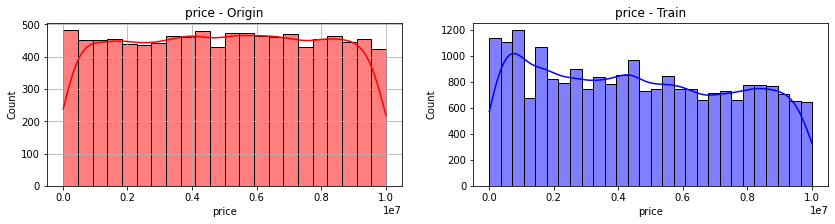

In [119]:
plt.figure(figsize=(14,3))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=origin[target], color='r', kde=True)
plt.title(target + ' - Origin')
plt.grid()
ax2 = plt.subplot(1,2,2)
sns.histplot(x=train[target], color='b', kde=True)
plt.title(target + ' - Train')
plt.show()

# 가격대의 분포가 다양하다

## Histogram

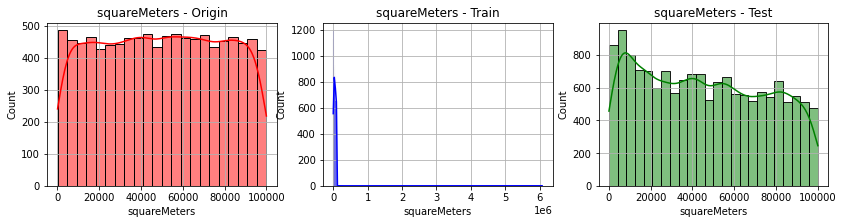

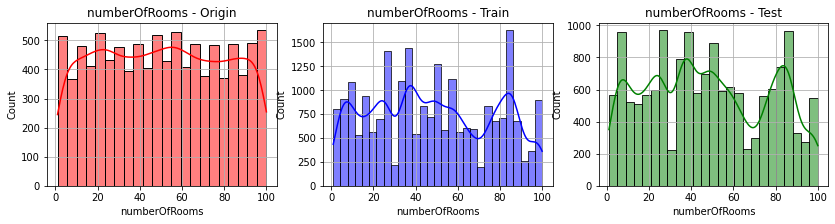

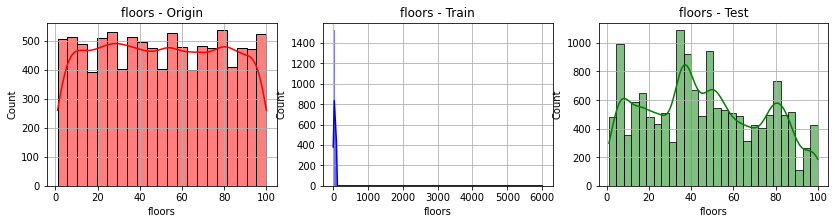

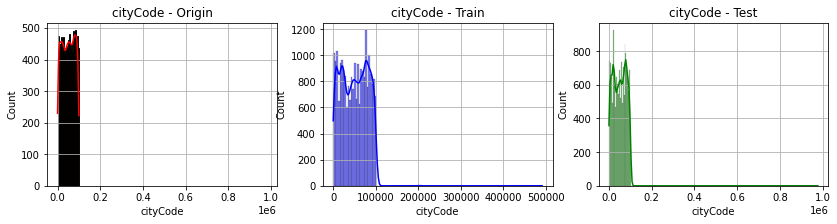

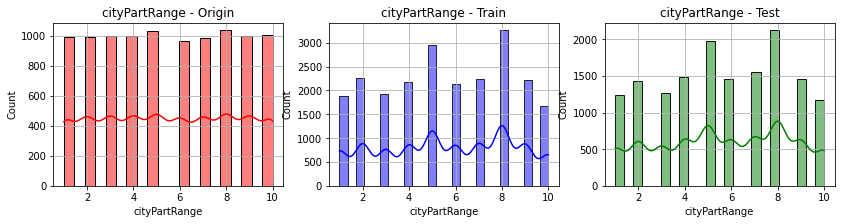

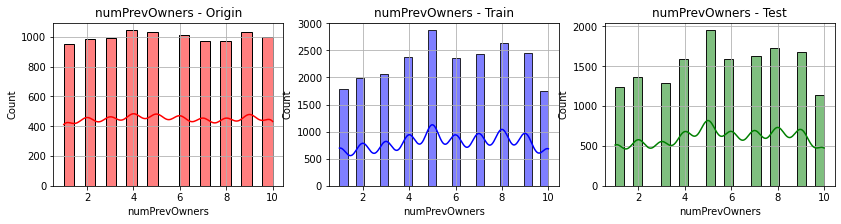

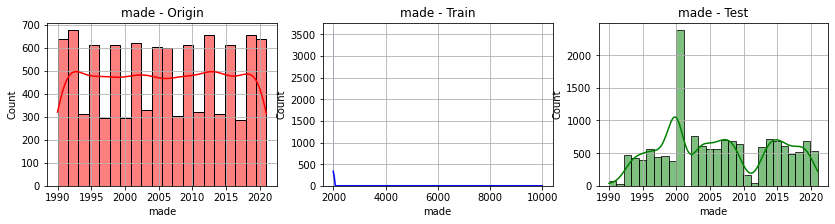

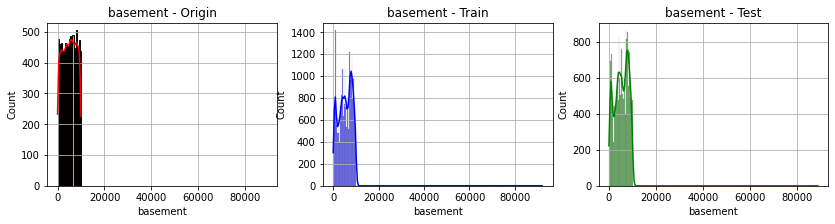

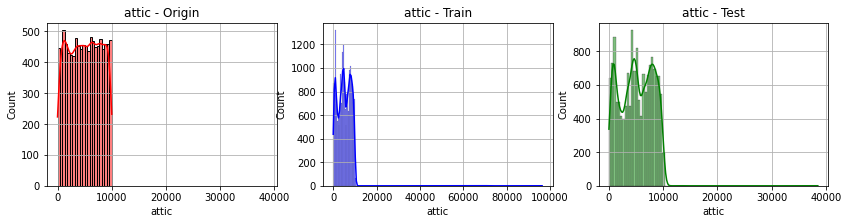

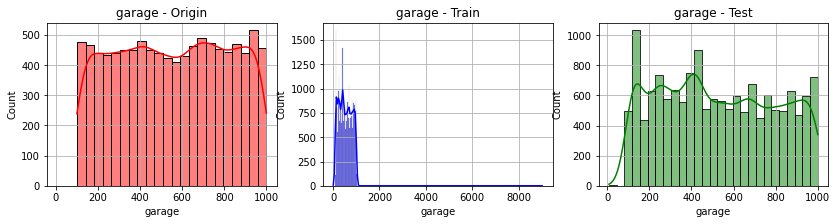

In [120]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=origin[f], color='r', kde=True)
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=train[f], color='b', kde=True)
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=test[f],color='g', kde=True)
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 확인 시 train,test에서 이상치로 보여 한 곳으로 밀집되는 경우가 있다. -> 비대칭(skewed) 데이터를 처리하는 3가지 방법 / Skewed Data https://dining-developer.tistory.com/18

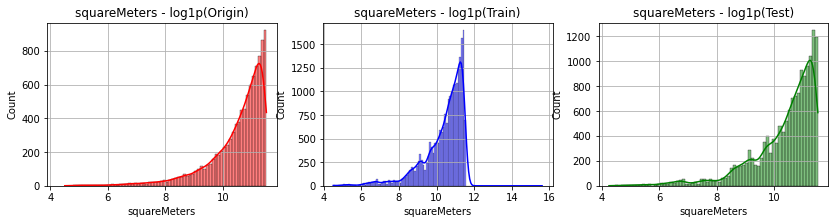

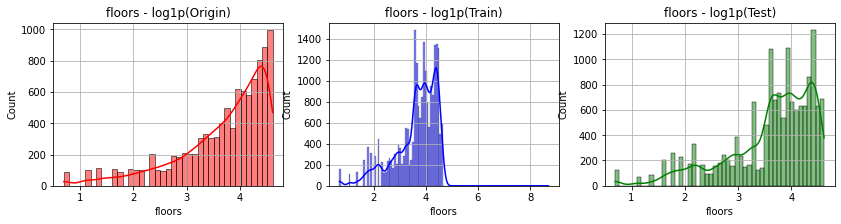

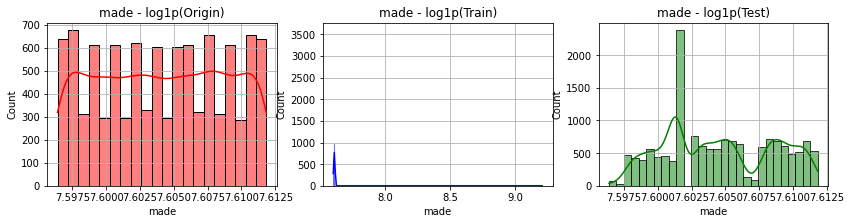

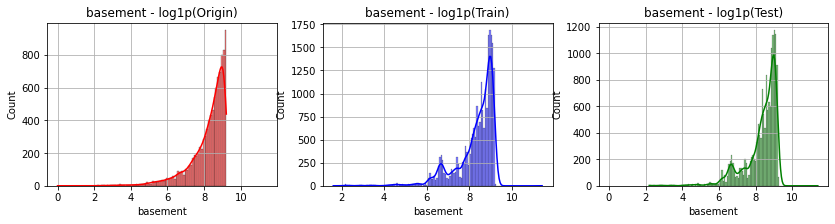

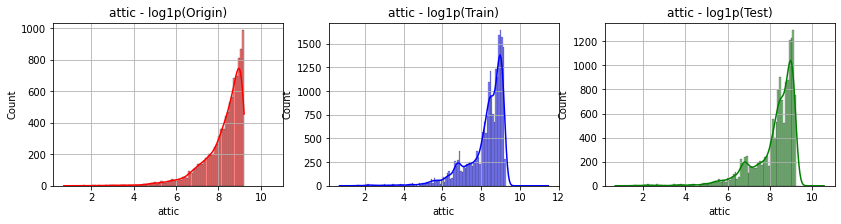

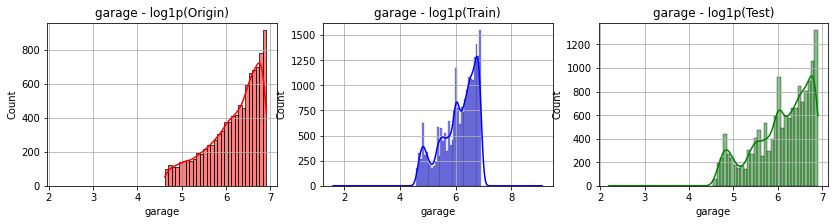

In [121]:
# 위에서 보인 비대칭 분포를 log 처리하여 분포를 확인해보자[https://steadiness-193.tistory.com/224] > 분포에 별 차이가 없다.
features_cont_log = ['squareMeters', 'floors','made', 'basement', 'attic', 'garage']

for f in features_cont_log:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=np.log1p(origin[f]), color='r', kde=True)
  plt.title(f + ' - log1p(Origin)')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=np.log1p(train[f]), color='b', kde=True)
  plt.title(f + ' - log1p(Train)')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=np.log1p(test[f]),color='g', kde=True)
  plt.title(f + ' - log1p(Test)')
  plt.grid()
  plt.show()

## Boxplot

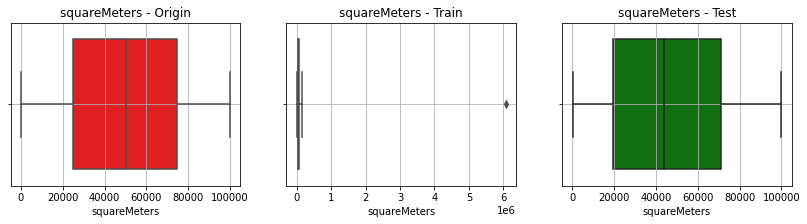

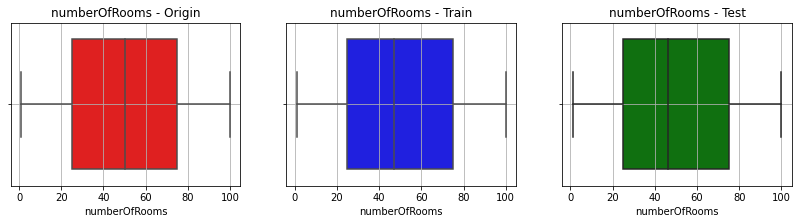

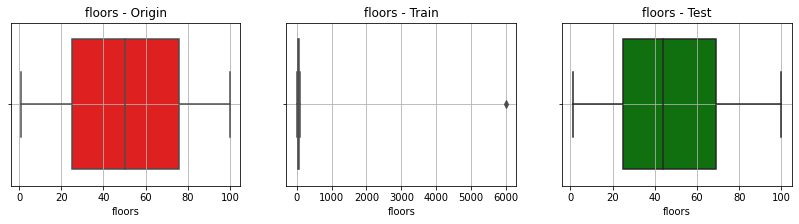

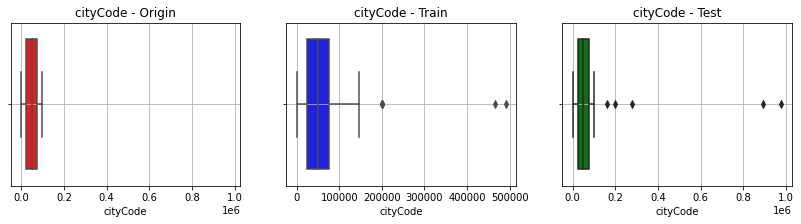

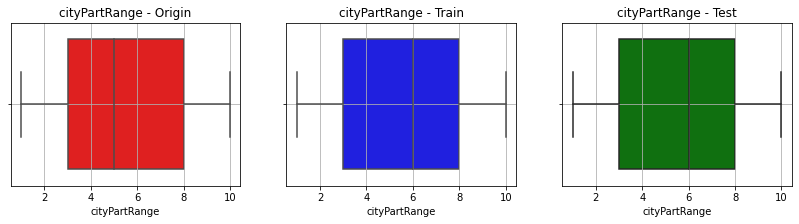

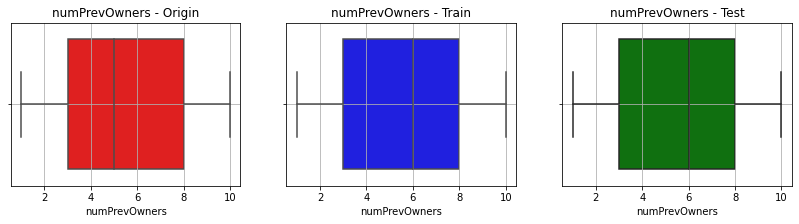

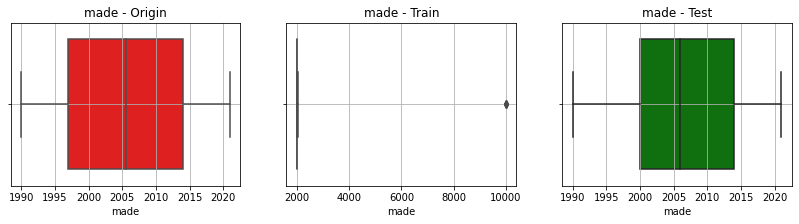

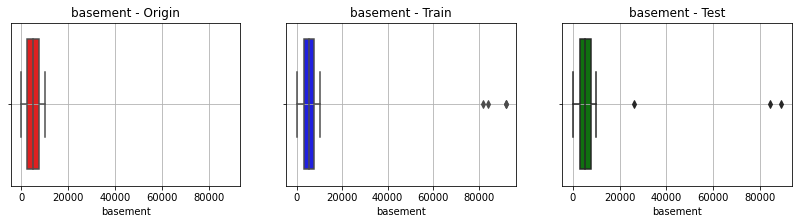

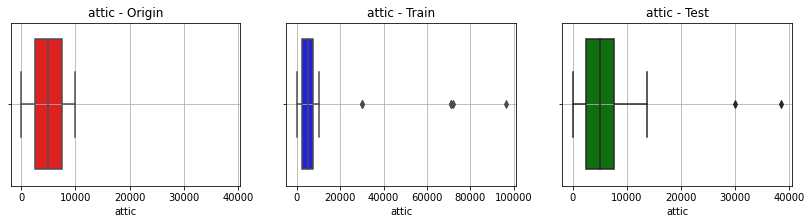

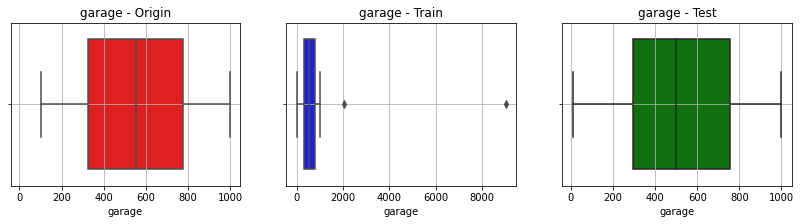

In [122]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.boxplot(x=origin[f], color='r')
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.boxplot(x=train[f], color='b')
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.boxplot(x=test[f],color='g')
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 원본에는 이상치 X, train/test이상치가 존재하는 것이 확인 -> squareMeter, floors, citycode, made, basement, attic, garage
# 다만 test 데이터 셋에서는 citycode, basement, attic 만 해당 됨 

## Countplot 

<ipython-input-123-af8c264576ab>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-af8c264576ab>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-af8c264576ab>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



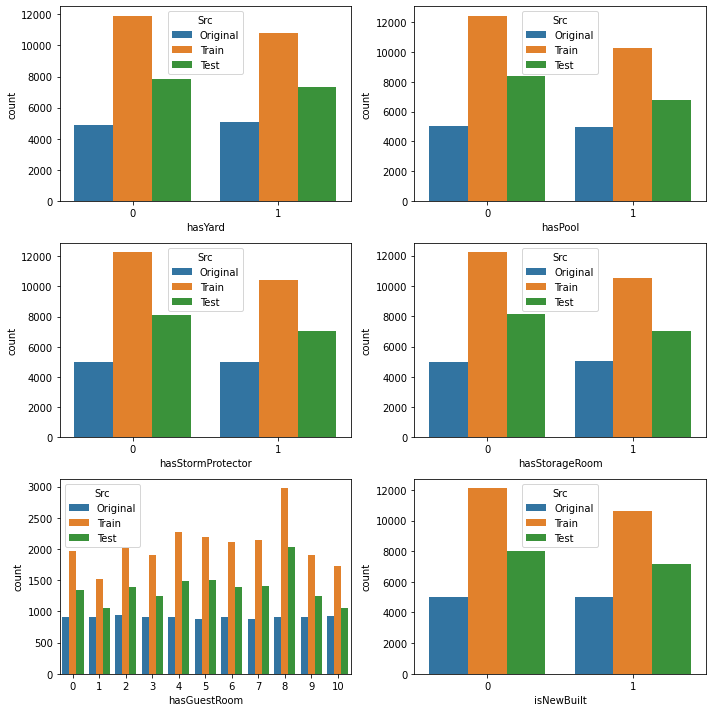

In [123]:
import math

features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

t1 = origin[features_dis]

# hue 값 설정 하기 위해 src이라는 새로운 열 생성 
t1['Src'] = 'Original'

t2 = train[features_dis]
t2['Src'] = 'Train'

t3 = test[features_dis]
t3['Src'] = 'Test'

t4 = pd.concat([t1,t2,t3]).reset_index(drop=True)

y=2
# 파이썬 올림, 내림 함수:  https://ooyoung.tistory.com/99
x = math.ceil((len(features_dis)-1)/y)

# nrows = x, ncols = y
plt.subplots(x, y, figsize=(10,10))

for i in range(1,len(features_dis)+1) :

    # 하위 서브 플롯
    plt.subplot(x, y, i)
    sns.countplot(data=t4, x=features_dis[i-1], hue='Src');

plt.tight_layout()    
plt.show()

# 모든 열의 비슷한 비율이 관찰되며 train/test 데이터 셋이 

# 데이터 관계 시각화

## Heatmap

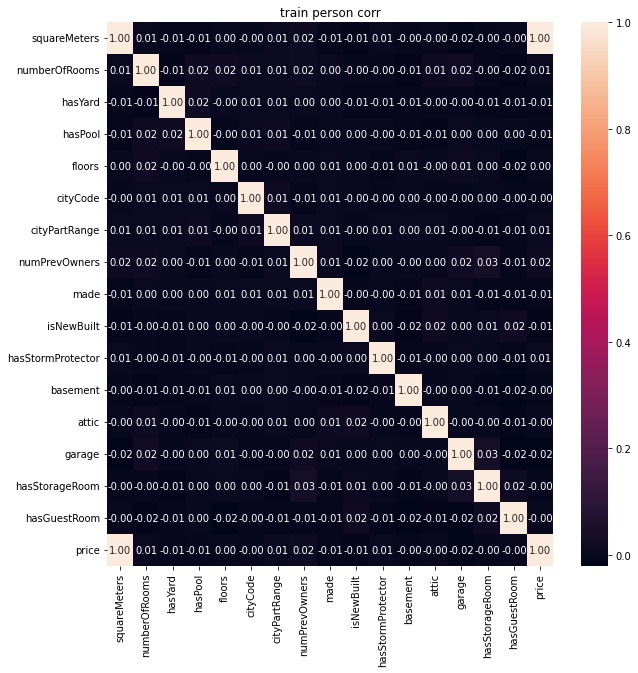

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(origin.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeter를 제외하고 다 약한 상관관계를 가지고 있다.

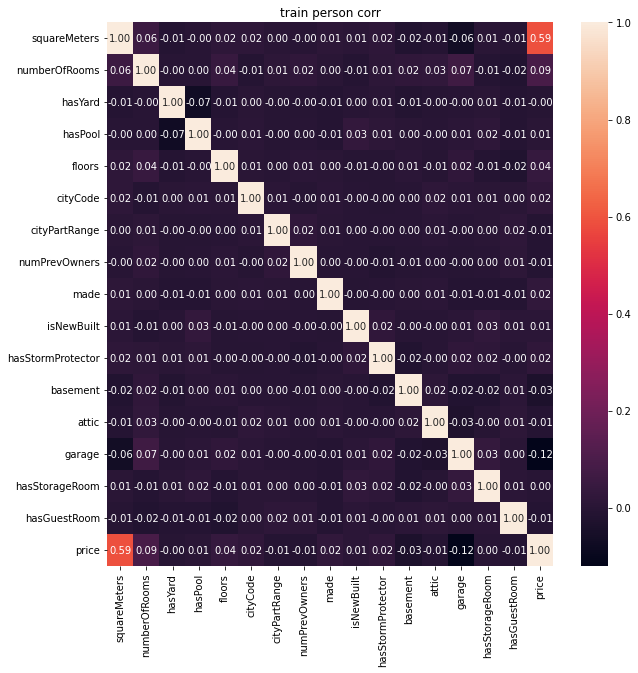

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeter를 제외하고 다 약한 상관관계를 가지고 있다.

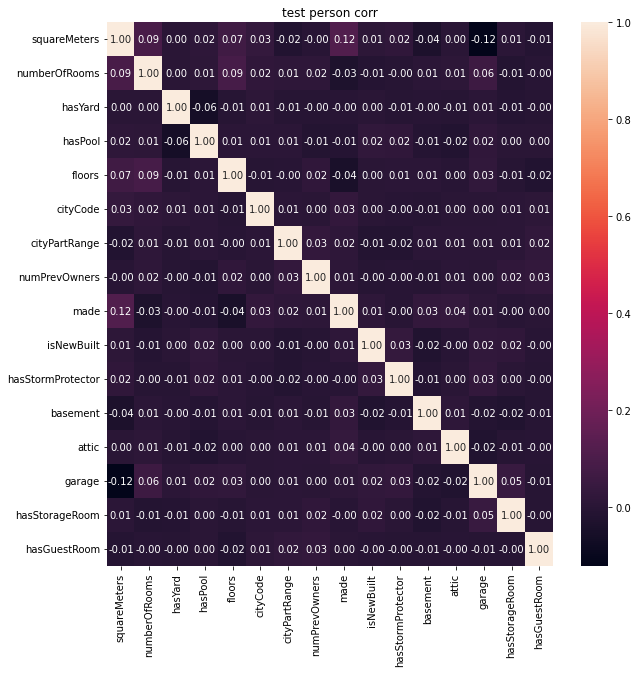

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("test person corr")
plt.show()

# 상관관계가 보이지 않음

## Regplot

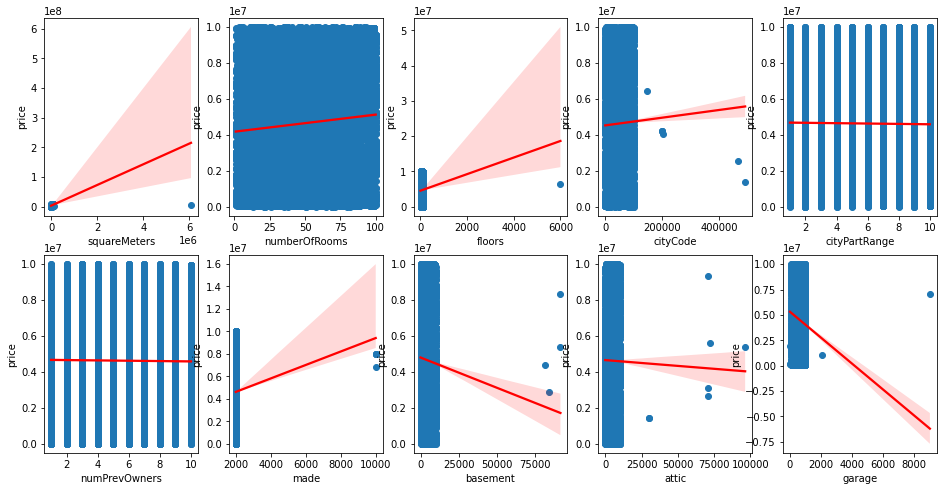

In [127]:
fig, axes = plt.subplots(figsize=(16,8), ncols=5, nrows=2)

for i, feature in enumerate(features_cont):
    row = int(i/5) 
    col = int(i%5)
    sns.regplot(x=feature,y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# 연속형 확인 시 squareMeters, floor, made가 어느정도 선형이 보임

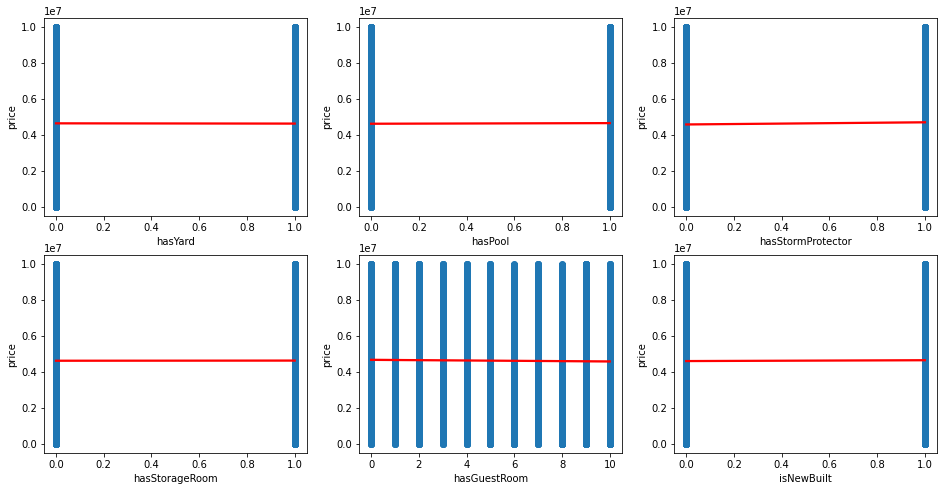

In [128]:
fig, axes = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

for i, feature in enumerate(features_dis):
    row = int(i/3) 
    col = int(i%3)
    sns.regplot(x=feature, y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# EDA 결과

- origin/train/test 데이터 셋에서는 결측치는 X 
- Boxplot 확인 시, train/test 데이터 셋에서 이상치는 다음과 같다 : squareMeters, floors, cityCode, made, basement, attic, garage는 
- Heatmap 확인 시 squaremeter 제외하고 다 약한 상관관계를 가지고 있다.
- Regplot 확인 시, basement, attic, garage는 price을 예측 시 도움이 되지 않는다


# 베이스라인 모델 구축



In [129]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/모듈_프로젝트_2/ep.6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 18), (15154, 17), (15154, 2))

# 피처 엔지니어링

In [130]:
# ID :  인덱스로 대체 가능 -> 제거
train.drop(columns=['id'],inplace=True)
test.drop(columns=['id'],inplace=True)

print(train.shape, test.shape)
train

(22730, 17) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


## 이상치 탐지 ( IQR )

- 앞 선 boxplot을 통해서 이상치를 확인 할 수 있었다. -> 이상치가 있는 특성만 따로 뽑아서 확인
  -  함수화 처리 참고 :  [IQR을 이용하여 이상치를 탐색하고 처리하기](https://hong-yp-ml-records.tistory.com/15)

In [131]:
# 이상치 탐지 ( 전체 부분 )
from collections import Counter

features_out = ['squareMeters', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage']

def detect_outliers(df,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items())
    
        
    return multiple_outliers

In [132]:
Outliers_to_drop = detect_outliers(train, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
train.loc[Outliers_to_drop] 
# iqr 방식으로 모든 이상치를 확인 

Counter({15334: 1, 5659: 1, 299: 1, 1326: 1, 2425: 1, 10987: 1, 20735: 1, 22631: 1, 2113: 1, 3608: 1, 19124: 1, 19748: 1, 21400: 1, 2107: 1, 3995: 1, 15068: 1, 18926: 1, 3828: 1, 4909: 1, 12858: 1, 13633: 1, 13642: 1, 17168: 1, 19994: 1, 14878: 1, 17629: 1})
이상치 총 개수 26 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1


In [133]:
## 이상치 전부 제거 (보류)
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [134]:
Outliers_to_drop = detect_outliers(test, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
test.loc[Outliers_to_drop] 

# 테스트 셋 기준, iqr 방식으로 이상치는 cityCode, basement, attic에 있음 -> 제거 X 

Counter({4987: 1, 6503: 1, 8215: 1, 10525: 1, 13111: 1, 696: 1, 1789: 1, 11191: 1, 2838: 1, 9148: 1})
이상치 총 개수 10 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
4987,42211,51,0,1,13,200801,2,8,2008,1,0,874,9238,796,0,10
6503,95894,34,1,1,7,889795,6,9,2005,0,1,7381,75,582,0,6
8215,68824,8,0,1,34,977950,4,5,1990,0,0,6044,2097,665,1,7
10525,18368,22,0,1,71,279019,8,10,2000,0,1,6133,6642,289,1,4
13111,33156,35,1,0,77,162019,5,5,1994,0,0,1285,5075,814,1,6
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [135]:
# 이상치 탐지 함수 ( 특징 하나 씩 보도록 변경 )

def detect_outlier(df,feature):
  
  Q1 = np.percentile(df[feature], 25)
  Q3 = np.percentile(df[feature], 75)
  IQR = Q3 - Q1
        
  outlier_step = 1.5 * IQR
  
  return df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]

#### squareMeters ( 방 면적 넓이 )
  - Boxplot 확인 시 1e6 = 1000000
  - [면적순 나라 목록](https://ko.wikipedia.org/wiki/%EB%A9%B4%EC%A0%81%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D) 기준으로 보면 나라의 크기를 나타냄 -> <u>이상치 확실</u>
    - 6071330m^2 : 1836577.33 평 [ 평수 계산기 사용 시 ]


In [136]:
detect_outlier(train,'squareMeters')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9


In [137]:
train.squareMeters.sort_values(ascending=False)
# 확인 시 2개가 이상치로 되어 있다

15334    6071330
4741      146181
17330      99985
14864      99985
5261       99985
          ...   
2356          89
14879         89
12130         89
14314         89
13338         89
Name: squareMeters, Length: 22730, dtype: int64

In [138]:
# 이상치 제거 보다는 최대값으로 대체
train.loc[train.index.isin([15334, 4741]), 'squareMeters'] = 99985

In [139]:
train.squareMeters.sort_values(ascending=False)

17330    99985
14864    99985
5261     99985
13686    99985
4741     99985
         ...  
2356        89
14879       89
12130       89
14314       89
13338       89
Name: squareMeters, Length: 22730, dtype: int64

#### floors ( 층 수 )
  - [런던·파리·뉴욕… 세계도 건물 높이 규제](https://www.seouland.com/arti/society/society_general/1609.html) 확인 시 최대 높이 기준 : 1973년 200m가 넘는 몽파르나스 타워(59층) ->  59층 이상도 이상치 인가? -> 확인 필요
  - Boxplot 확인 시 현재 존재하는 건물 들 중 6000층은 말이 안됨 -> <u>이상치 확실</u> 

In [140]:
# train[train.floors > 59]
# 데이터가 제거 시 데이터가 너무 적어짐 ->  방식 X

In [141]:
detect_outlier(train,'floors')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1


In [142]:
train.loc[train.index.isin([5659]), 'floors'] = 100

In [143]:
train.floors.sort_values(ascending=False)

19957    100
1456     100
15969    100
4812     100
6200     100
        ... 
13597      1
12698      1
8715       1
16467      1
21759      1
Name: floors, Length: 22730, dtype: int64

### CityCode ( 도시 코드 )

- 임의로 만들어진 특성이므로 의미가 없다고 함 -> [cityCode is Fake!](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384676) -> 열 자체 삭제 권장

In [144]:
detect_outlier(train,'cityCode')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8


### made (제작년도) 

- 2021년도 기준으로 초과 시 미래 시간 (존재하지 않음) -> <u>이상치 확실

In [145]:
detect_outlier(train,'made')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1
19124,80062,52,0,0,84,67099,9,4,10000,0,0,7677,5017,148,0,4,8007951.1
19748,80062,58,0,1,86,40408,7,8,10000,0,0,7059,7307,287,0,2,8007951.1
21400,80062,78,0,0,84,59457,4,7,10000,1,0,6382,9507,298,1,4,8007951.1


In [146]:
train.loc[train.index.isin([2113,3608,19124,19748,21400]), 'made'] = 2021

In [147]:
train.made.sort_values(ascending=False)

21230    2021
19799    2021
20140    2021
2556     2021
17522    2021
         ... 
4307     1990
435      1990
10053    1990
10624    1990
10157    1990
Name: made, Length: 22730, dtype: int64

### basement( 지하실 면적 넓이 )

In [148]:
detect_outlier(train,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2107,28956,100,0,1,35,39767,6,9,2000,0,1,84333,8777,655,0,1,2898953.1
3995,43758,14,0,0,93,62528,3,9,2008,0,0,81851,9179,243,0,2,4385098.8
15068,83358,35,1,0,83,22449,9,2,2015,0,0,91992,299,897,0,0,8341911.5
18926,53671,55,0,1,85,6249,7,6,2017,0,1,91978,959,515,1,2,5378022.7


In [149]:
detect_outlier(test,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5


In [150]:
train.basement.sort_values(ascending=False)[:10]

15068    91992
18926    91978
2107     84333
3995     81851
12829    10000
816      10000
336      10000
8824     10000
352      10000
971      10000
Name: basement, dtype: int64

In [151]:
test.basement.sort_values(ascending=False)[:10]

11191    89016
1789     84333
696      26132
5048     10000
2073     10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
Name: basement, dtype: int64

In [152]:
train.loc[train.index.isin([2107,3995,15068,18926]), 'basement'] = 10000
test.loc[test.index.isin([696,1789,11191]), 'basement'] = 10000

In [153]:
train.basement.sort_values(ascending=False)[:10]

12829    10000
1433     10000
336      10000
8824     10000
352      10000
971      10000
3995     10000
6545     10000
18640    10000
19194    10000
Name: basement, dtype: int64

In [154]:
test.basement.sort_values(ascending=False)[:10]

5048     10000
696      10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
2073     10000
6723     10000
10285    10000
Name: basement, dtype: int64

### attic ( 다락방 면적 넓이 )

In [155]:
detect_outlier(train,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3828,31357,80,0,1,35,56962,9,4,2017,1,0,1284,71001,212,0,5,3141062.7
4909,26484,33,0,1,37,83634,5,3,1997,1,1,774,71001,663,0,1,2654798.7
12858,93278,41,1,1,56,46600,9,8,2015,0,1,4145,71024,473,0,3,9339538.5
13633,53708,81,0,0,84,12841,7,6,2006,1,1,759,96381,860,1,8,5378041.6
13642,14588,36,0,0,16,3578,5,2,2003,0,1,5361,30000,357,0,4,1459601.3
17168,56147,100,0,0,35,79570,7,7,2016,1,1,9631,71965,973,0,6,5621340.6
19994,14588,43,1,0,23,38270,10,7,2003,0,1,9789,30000,177,1,4,1459601.3


In [156]:
detect_outlier(test,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [157]:
train.attic.sort_values(ascending=False)[:10]

13633    96381
17168    71965
12858    71024
4909     71001
3828     71001
19994    30000
13642    30000
9115     10000
2014     10000
5991     10000
Name: attic, dtype: int64

In [158]:
test.attic.sort_values(ascending=False)[:10]

2838     38535
9148     30000
14769    13779
4892     10000
11506    10000
81       10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

In [159]:
train.loc[train.index.isin([3828,4909,12858,13633,13642,17168,19994]), 'attic'] = 10000
test.loc[test.index.isin([2838,9148,14769]), 'attic'] = 10000

In [160]:
train.attic.sort_values(ascending=False)[:10]

8956     10000
13347    10000
12858    10000
2014     10000
5991     10000
9864     10000
13633    10000
9115     10000
13642    10000
19994    10000
Name: attic, dtype: int64

In [161]:
test.attic.sort_values(ascending=False)[:10]

4892     10000
11506    10000
2838     10000
81       10000
14769    10000
9148     10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

### garage ( 주차 공간 크기 )

In [162]:
detect_outlier(train,'garage')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
14878,10380,44,0,0,41,40504,1,4,2020,0,0,8876,803,2048,0,2,1049793.1
17629,70409,86,0,0,90,85476,5,6,2000,1,0,2522,9057,9017,1,3,7042999.2


In [163]:
train.garage.sort_values(ascending=False)[:10]

17629    9017
14878    2048
19089    1000
13018    1000
5981     1000
9597     1000
10458    1000
1074     1000
21585    1000
14120    1000
Name: garage, dtype: int64

In [164]:
train.loc[train.index.isin([14878,17629]), 'garage'] = 1000

In [165]:
train.garage.sort_values(ascending=False)[:10]

19089    1000
14105    1000
17279    1000
5981     1000
9597     1000
10458    1000
1074     1000
21585    1000
14120    1000
6042     1000
Name: garage, dtype: int64

## 데이터 합치기

In [166]:
all_data = pd.concat([origin,train,test], ignore_index=True)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1,NaN
47880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0,NaN
47881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10,NaN
47882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2,NaN


In [167]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47884 non-null  int64  
 1   numberOfRooms      47884 non-null  int64  
 2   hasYard            47884 non-null  int64  
 3   hasPool            47884 non-null  int64  
 4   floors             47884 non-null  int64  
 5   cityCode           47884 non-null  int64  
 6   cityPartRange      47884 non-null  int64  
 7   numPrevOwners      47884 non-null  int64  
 8   made               47884 non-null  int64  
 9   isNewBuilt         47884 non-null  int64  
 10  hasStormProtector  47884 non-null  int64  
 11  basement           47884 non-null  int64  
 12  attic              47884 non-null  int64  
 13  garage             47884 non-null  int64  
 14  hasStorageRoom     47884 non-null  int64  
 15  hasGuestRoom       47884 non-null  int64  
 16  price              327

## 파생 피처 생성 
- 성능 높이기 위해서 만듬
- 현재 특성에서 학습을 시킬 수 있는 부분을 좀 더 만들어 보자

  - 방 면적 너비와 방의 수 간의 상호 작용 -> 집에서 공간이 어떻게 사용되는 가?

  - 층 수에 따른 방의 수 -> 방이 많을 수록 손님이 많이 온다 -> 기격 영향에 미치는 가? 

  - 방의 수와 마당의 존재 사이의 상호 작용 ->  야외 공간이 가격에 영향을 미치는 가?

  - 부동산이 만들어진 연도와 신축 여부 사이의 상호 작용 -> 신축 건물이 가격이 영향에 미치는 가?

  - 지하실 크기와 다락방 크기 사이의 상호 작용: 거주 시 사용할 수 있는 추가 공간이 가격이 영향이 미치는 가? 
  
  - 창고의 존재와 객실의 존재 사이의 상호 작용 -> 얼마나 많은 공간이 창고와 손님에게 할당되는가?
    
  - 날짜에서 정보 추출 : 집의 나이, 집이 지어진 후 경과된 시간과 같은 정보를 추출

In [168]:
# 파생 피처 생성 함수 

def feature_interaction(df):
    df['squareMeters_numRooms'] = df['squareMeters'] * df['numberOfRooms']
    df['roomsPerFloor'] = df['numberOfRooms'] / df['floors']
    df['room_yard_interaction'] = df['numberOfRooms'] * df['hasYard']
    df['made_isNewBuilt'] = df['made'] * df['isNewBuilt']
    df['Basement_Attic_Interaction'] = df['basement'] * df['attic']
    df['storage_guest_interaction'] = df['hasStorageRoom'] * df['hasGuestRoom']
    df['age'] = 2021 - df['made']
    df['prevOwnersPerYear'] = df['numPrevOwners'] / df['age']

    return df

In [169]:
all_data = feature_interaction(all_data)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,hasGuestRoom,price,squareMeters_numRooms,roomsPerFloor,room_yard_interaction,made_isNewBuilt,Basement_Attic_Interaction,storage_guest_interaction,age,prevOwnersPerYear
0,75523,3,0,1,63,9373,3,8,2005,0,...,7,7559081.5,226569,0.047619,0,0,38838565,0,16,0.500000
1,80771,39,1,1,98,39381,8,6,2015,1,...,2,8085989.5,3150069,0.397959,39,2015,8898708,2,6,1.000000
2,55712,58,0,1,19,34457,6,8,2021,0,...,9,5574642.1,3231296,3.052632,0,0,25998324,9,0,inf
3,32316,47,0,0,6,27939,10,4,2012,0,...,3,3232561.2,1518852,7.833333,0,0,4705919,0,9,0.444444
4,70429,19,1,1,90,38045,3,7,1990,1,...,4,7055052.0,1338151,0.211111,19,1990,20488615,4,31,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,86184,74,1,1,73,14009,2,10,1993,1,...,1,NaN,6377616,1.013699,74,1993,14462316,1,28,0.357143
47880,45885,41,1,1,64,84208,4,5,2008,0,...,0,NaN,1881285,0.640625,41,0,5972724,0,13,0.384615
47881,73554,51,0,0,41,49263,10,5,2004,0,...,10,NaN,3751254,1.243902,0,0,14583839,0,17,0.294118
47882,77604,51,0,1,33,67056,4,3,2019,0,...,2,NaN,3957804,1.545455,0,0,92964068,0,2,1.500000


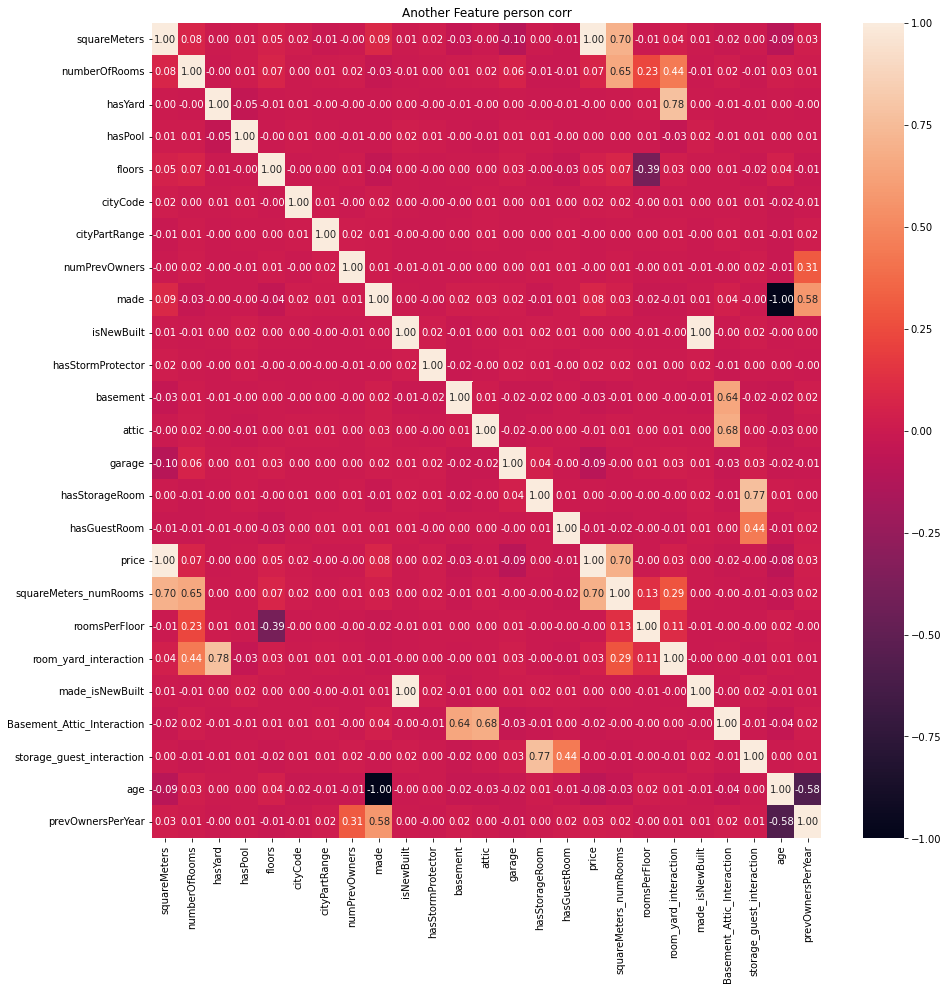

In [170]:
plt.figure(figsize=(15,15))
sns.heatmap(all_data.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("Another Feature person corr")
plt.show()

## 피쳐 제거(선택)

- 상관관계에서 가격 예측 시 필요한 특성만 사용하도록 하자

In [171]:
# 앞 선 EDA를 통해서 성능을 올리기 위해서 상관관계에서 price 예측과 연관 없는 특성 선택
feats_drop = ['cityCode','squareMeters_numRooms','roomsPerFloor','room_yard_interaction','made_isNewBuilt','Basement_Attic_Interaction','storage_guest_interaction','age','prevOwnersPerYear']
all_data = all_data.drop(feats_drop, axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47884 non-null  int64  
 1   numberOfRooms      47884 non-null  int64  
 2   hasYard            47884 non-null  int64  
 3   hasPool            47884 non-null  int64  
 4   floors             47884 non-null  int64  
 5   cityPartRange      47884 non-null  int64  
 6   numPrevOwners      47884 non-null  int64  
 7   made               47884 non-null  int64  
 8   isNewBuilt         47884 non-null  int64  
 9   hasStormProtector  47884 non-null  int64  
 10  basement           47884 non-null  int64  
 11  attic              47884 non-null  int64  
 12  garage             47884 non-null  int64  
 13  hasStorageRoom     47884 non-null  int64  
 14  hasGuestRoom       47884 non-null  int64  
 15  price              32730 non-null  float64
dtypes: float64(1), int64(1

## 데이터 나누기

In [172]:
# 정답의 결측 여부로 해결
X_sub = all_data[pd.isnull(all_data['price'])] # submisson용

# 훈련용
X = all_data[~pd.isnull(all_data['price'])] 
print(X.shape, X_sub.shape)
X.head() # Price 제거 필요

(32730, 16) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [173]:
y = X['price']
X = X.drop( ['price'], axis=1 )
X_sub = X_sub.drop( ['price'], axis=1 )

In [174]:
print(X.shape, X_sub.shape, y.shape)

(32730, 15) (15154, 15) (32730,)


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22911, 15), (9819, 15), (22911,), (9819,))

# 베이스 모델 학습 및 평가

In [176]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

# 모델 예측
y_pred = lr_model.predict(X_test)
y_pred.shape

(9819,)

In [177]:
# 모델 평가 함수

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def show_reg_metric(true, preds):
  mae   = mean_absolute_error(true, preds)
  mse   = mean_squared_error(true, preds)
  rmse  = np.sqrt( mse )
  msle  = mean_squared_log_error(true, preds)
  rmsle = np.sqrt( msle )
  r2    = r2_score(true, preds)
  print('-'*30)
  print(f'mae \t {mae:.3f}' )
  print(f'mse \t {mse:.3f}' )
  print(f'rmse \t {rmse:.3f}' )
  print(f'msle \t {msle:.3f}' )
  print(f'rmsle \t {rmsle:.3f}' )
  print(f'r2 \t {r2:.3f}' )
  print('-'*30)

show_reg_metric(y_test, y_pred)

------------------------------
mae 	 9952.412
mse 	 34672920058.608
rmse 	 186206.660
msle 	 0.005
rmsle 	 0.069
r2 	 0.996
------------------------------


In [178]:
# 테스트 데이터로 예측
sub_y_pred = lr_model.predict(X_sub) 

submission['price'] = sub_y_pred
submission.to_csv('submission.csv', index=False) # 파일로 저장

# 현재기준 ( 2/9 ) 100위권 이내 들어감

# 모델 선정 및 비교

In [179]:
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit

def RMSE(y, y_pred):
    rmse =  np.sqrt(mean_squared_error(y, y_pred))
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(X_train1, y_train1)
        pred = clf.predict(X_test1)
        rmse = RMSE(y_test1, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSE: {r:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elstic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
#ada = AdaBoostRegressor() 
xgb = XGBRegressor()
lgbm = LGBMRegressor()

In [181]:
models = []
scores = []
for model in [lr, ridge, lasso, elstic, dt, rf, gb, xgb, lgbm]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 28.53it/s]


1 FOLDS: LinearRegression RMSE: 38955.0753
2 FOLDS: LinearRegression RMSE: 190580.7872
3 FOLDS: LinearRegression RMSE: 177282.3506
4 FOLDS: LinearRegression RMSE: 144740.1781
5 FOLDS: LinearRegression RMSE: 40385.2511
6 FOLDS: LinearRegression RMSE: 202240.8262
7 FOLDS: LinearRegression RMSE: 65118.7677
8 FOLDS: LinearRegression RMSE: 172535.8040
9 FOLDS: LinearRegression RMSE: 163315.5700
10 FOLDS: LinearRegression RMSE: 165044.8811

LinearRegression mean RMSE: 136019.9491


Ridge Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 48.83it/s]


1 FOLDS: Ridge RMSE: 38950.5684
2 FOLDS: Ridge RMSE: 190580.7389
3 FOLDS: Ridge RMSE: 177282.3560
4 FOLDS: Ridge RMSE: 144739.9695
5 FOLDS: Ridge RMSE: 40385.1147
6 FOLDS: Ridge RMSE: 202240.7754
7 FOLDS: Ridge RMSE: 65118.7534
8 FOLDS: Ridge RMSE: 172535.8187
9 FOLDS: Ridge RMSE: 163315.5803
10 FOLDS: Ridge RMSE: 165044.8407

Ridge mean RMSE: 136019.4516


Lasso Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 41.29it/s]


1 FOLDS: Lasso RMSE: 38953.8495
2 FOLDS: Lasso RMSE: 190580.6982
3 FOLDS: Lasso RMSE: 177282.3361
4 FOLDS: Lasso RMSE: 144739.8763
5 FOLDS: Lasso RMSE: 40384.8825
6 FOLDS: Lasso RMSE: 202240.7050
7 FOLDS: Lasso RMSE: 65118.7937
8 FOLDS: Lasso RMSE: 172535.9011
9 FOLDS: Lasso RMSE: 163315.6299
10 FOLDS: Lasso RMSE: 165044.5897

Lasso mean RMSE: 136019.7262


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 39.21it/s]


1 FOLDS: ElasticNet RMSE: 37883.5484
2 FOLDS: ElasticNet RMSE: 190581.3606
3 FOLDS: ElasticNet RMSE: 177321.2665
4 FOLDS: ElasticNet RMSE: 144493.9215
5 FOLDS: ElasticNet RMSE: 40230.6619
6 FOLDS: ElasticNet RMSE: 202146.5774
7 FOLDS: ElasticNet RMSE: 65108.6898
8 FOLDS: ElasticNet RMSE: 172585.3644
9 FOLDS: ElasticNet RMSE: 163360.9488
10 FOLDS: ElasticNet RMSE: 164919.5936

ElasticNet mean RMSE: 135863.1933


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]


1 FOLDS: DecisionTreeRegressor RMSE: 40124.1468
2 FOLDS: DecisionTreeRegressor RMSE: 190668.6095
3 FOLDS: DecisionTreeRegressor RMSE: 251506.1677
4 FOLDS: DecisionTreeRegressor RMSE: 217892.7699
5 FOLDS: DecisionTreeRegressor RMSE: 188446.1657
6 FOLDS: DecisionTreeRegressor RMSE: 209748.9411
7 FOLDS: DecisionTreeRegressor RMSE: 306696.8775
8 FOLDS: DecisionTreeRegressor RMSE: 40840.8991
9 FOLDS: DecisionTreeRegressor RMSE: 91822.1918
10 FOLDS: DecisionTreeRegressor RMSE: 312330.9532

DecisionTreeRegressor mean RMSE: 185007.7722


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [01:20<00:00,  8.08s/it]


1 FOLDS: RandomForestRegressor RMSE: 41183.5160
2 FOLDS: RandomForestRegressor RMSE: 197828.1363
3 FOLDS: RandomForestRegressor RMSE: 200583.5462
4 FOLDS: RandomForestRegressor RMSE: 170472.0242
5 FOLDS: RandomForestRegressor RMSE: 121036.1858
6 FOLDS: RandomForestRegressor RMSE: 193041.0420
7 FOLDS: RandomForestRegressor RMSE: 123503.5116
8 FOLDS: RandomForestRegressor RMSE: 84570.5761
9 FOLDS: RandomForestRegressor RMSE: 109475.3761
10 FOLDS: RandomForestRegressor RMSE: 147297.4808

RandomForestRegressor mean RMSE: 138899.1395


GradientBoostingRegressor Cross Validations...: 100%|██████████| 10/10 [00:27<00:00,  2.74s/it]


1 FOLDS: GradientBoostingRegressor RMSE: 44600.2918
2 FOLDS: GradientBoostingRegressor RMSE: 193292.1796
3 FOLDS: GradientBoostingRegressor RMSE: 221788.1315
4 FOLDS: GradientBoostingRegressor RMSE: 153887.3888
5 FOLDS: GradientBoostingRegressor RMSE: 112480.3044
6 FOLDS: GradientBoostingRegressor RMSE: 190170.4991
7 FOLDS: GradientBoostingRegressor RMSE: 89337.0905
8 FOLDS: GradientBoostingRegressor RMSE: 156100.7407
9 FOLDS: GradientBoostingRegressor RMSE: 139376.0919
10 FOLDS: GradientBoostingRegressor RMSE: 142895.2256

GradientBoostingRegressor mean RMSE: 144392.7944


XGBRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  5.98it/s]

[08:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.92it/s]

[08:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.94it/s]

[08:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.32it/s]

[08:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

[08:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

[08:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  70%|███████   | 7/10 [00:03<00:02,  1.35it/s]

[08:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  80%|████████  | 8/10 [00:05<00:01,  1.18it/s]

[08:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  90%|█████████ | 9/10 [00:06<00:01,  1.10s/it]

[08:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


1 FOLDS: XGBRegressor RMSE: 44291.6826
2 FOLDS: XGBRegressor RMSE: 192233.8626
3 FOLDS: XGBRegressor RMSE: 208002.0780
4 FOLDS: XGBRegressor RMSE: 147614.0674
5 FOLDS: XGBRegressor RMSE: 97790.0965
6 FOLDS: XGBRegressor RMSE: 193656.3030
7 FOLDS: XGBRegressor RMSE: 108320.2593
8 FOLDS: XGBRegressor RMSE: 169099.5225
9 FOLDS: XGBRegressor RMSE: 153457.6488
10 FOLDS: XGBRegressor RMSE: 162829.3630

XGBRegressor mean RMSE: 147729.4884


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

1 FOLDS: LGBMRegressor RMSE: 51180.8360
2 FOLDS: LGBMRegressor RMSE: 192111.6730
3 FOLDS: LGBMRegressor RMSE: 180542.2884
4 FOLDS: LGBMRegressor RMSE: 147774.1659
5 FOLDS: LGBMRegressor RMSE: 55314.1168
6 FOLDS: LGBMRegressor RMSE: 203541.9879
7 FOLDS: LGBMRegressor RMSE: 76838.0184
8 FOLDS: LGBMRegressor RMSE: 167946.4163
9 FOLDS: LGBMRegressor RMSE: 158539.0491
10 FOLDS: LGBMRegressor RMSE: 170394.0048

LGBMRegressor mean RMSE: 140418.2557


In [182]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,136019.949143
1,Ridge,136019.451608
2,Lasso,136019.726187
3,ElasticNet,135863.193291
4,DecisionTreeRegressor,185007.772234
5,RandomForestRegressor,138899.139507
6,GradientBoostingRegressor,144392.794387
7,XGBRegressor,147729.488368
8,LGBMRegressor,140418.255662


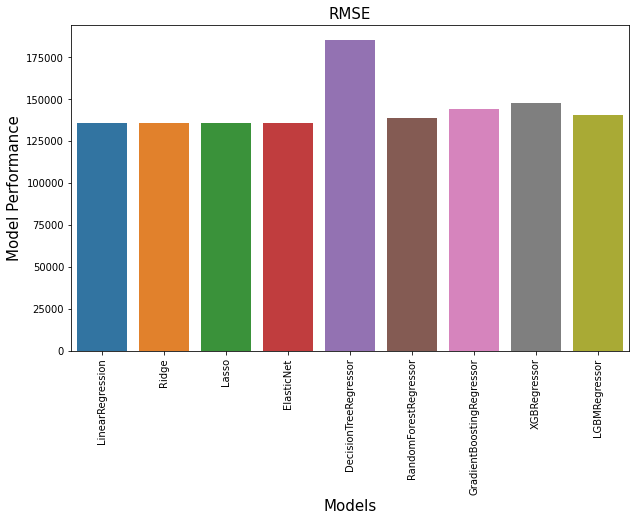

In [183]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSE', fontsize=15)
plt.show()

## 하이퍼 파라미터 튜닝 - Optuna

- Discussions 이나 bestScore 확인 시, XGBRegressor 사용 시 가장 성능이 좋게 나오는 것을 알 수 있다
- [공식문서](https://xgboost.readthedocs.io/en/stable/parameter.html)
- [XGBoost 개념 이해](https://wooono.tistory.com/97)
- [XGBoost 주요 파라미터](https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC)
- [XGBoost와 LightGBM 하이퍼파라미터 튜닝 가이드](https://psystat.tistory.com/131)

In [184]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [186]:
sampler = TPESampler(seed=42)

def objectiveXGB(trial):

  param = {
  'max_depth':trial.suggest_int('max_depth',3,10),  
  'learning_rate': trial.suggest_float('learning_rate',0.01, 0.1),
  'n_estimators':trial.suggest_int('n_estimators',100, 3000),
  #'subsample':trial.suggest_float('subsample',0.5, 1),
  #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
  #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
  #'lambda': trial.suggest_float('lambda', 0.001, 1.0),
  #'alpha': trial.suggest_float('alpha', 0.001, 1.0),
  #'random_state': 42
  }
  model = XGBRegressor(**param)
  model.fit(X_train, y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=25)
  pred = model.predict(X_test)
  return RMSE(y_test, pred)


In [187]:
# RMSE가 최소가 되는 방향으로 학습을 진행
studyXGB = optuna.create_study(direction='minimize', sampler=sampler)

# n_trials 지정
studyXGB.optimize(objectiveXGB, n_trials=50)

[I 2023-02-15 08:11:11,109] A new study created in memory with name: no-name-78c5603b-d175-4768-a0bc-2b366909d24f


[08:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.02579e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.54647e+06
[2]	validation_0-rmse:4.11275e+06
[3]	validation_0-rmse:3.72067e+06
[4]	validation_0-rmse:3.36622e+06
[5]	validation_0-rmse:3.04549e+06
[6]	validation_0-rmse:2.75555e+06
[7]	validation_0-rmse:2.49311e+06
[8]	validation_0-rmse:2.25597e+06
[9]	validation_0-rmse:2.04178e+06
[10]	validation_0-rmse:1.84815e+06
[11]	validation_0-rmse:1.6731e+06
[12]	validation_0-rmse:1.51497e+06
[13]	validation_0-rmse:1.37218e+06
[14]	validation_0-rmse:1.24307e+06
[15]	validation_0-rmse:1.1267e+06
[16]	validation_0-rmse:1.0216e+06
[17]	validation_0-rmse:926896
[18]	validation_0-rmse:841507
[19]	validation_0-rmse:764645
[20]	validation_0-rmse:695518
[21]	validation_0-rmse:633362
[22]	validation_0-rmse:577606
[23]	validation_0-rmse:527743
[24]	validation_

[I 2023-02-15 08:11:14,213] Trial 0 finished with value: 158094.5604088307 and parameters: {'max_depth': 5, 'learning_rate': 0.09556428757689246, 'n_estimators': 2223}. Best is trial 0 with value: 158094.5604088307.


[08:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.42274e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.2925e+06
[2]	validation_0-rmse:5.16541e+06
[3]	validation_0-rmse:5.04148e+06
[4]	validation_0-rmse:4.92047e+06
[5]	validation_0-rmse:4.80243e+06
[6]	validation_0-rmse:4.68717e+06
[7]	validation_0-rmse:4.57466e+06
[8]	validation_0-rmse:4.46489e+06
[9]	validation_0-rmse:4.35783e+06
[10]	validation_0-rmse:4.25323e+06
[11]	validation_0-rmse:4.15117e+06
[12]	validation_0-rmse:4.05157e+06
[13]	validation_0-rmse:3.95442e+06
[14]	validation_0-rmse:3.8596e+06
[15]	validation_0-rmse:3.76707e+06
[16]	validation_0-rmse:3.67677e+06
[17]	validation_0-rmse:3.58862e+06
[18]	validation_0-rmse:3.50254e+06
[19]	validation_0-rmse:3.41858e+06
[20]	validation_0-rmse:3.33661e+06
[21]	validation_0-rmse:3.25664e+06
[22]	validation_0-rmse:3.17859e+06
[23]	validation

[I 2023-02-15 08:11:43,690] Trial 1 finished with value: 171615.9953668912 and parameters: {'max_depth': 7, 'learning_rate': 0.02404167763981929, 'n_estimators': 552}. Best is trial 0 with value: 158094.5604088307.


[08:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.06904e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.62562e+06
[2]	validation_0-rmse:4.22067e+06
[3]	validation_0-rmse:3.85178e+06
[4]	validation_0-rmse:3.51459e+06
[5]	validation_0-rmse:3.20777e+06
[6]	validation_0-rmse:2.92749e+06
[7]	validation_0-rmse:2.67233e+06
[8]	validation_0-rmse:2.43929e+06
[9]	validation_0-rmse:2.22694e+06
[10]	validation_0-rmse:2.03342e+06
[11]	validation_0-rmse:1.85672e+06
[12]	validation_0-rmse:1.69536e+06
[13]	validation_0-rmse:1.54884e+06
[14]	validation_0-rmse:1.41499e+06
[15]	validation_0-rmse:1.2932e+06
[16]	validation_0-rmse:1.1823e+06
[17]	validation_0-rmse:1.08113e+06
[18]	validation_0-rmse:989264
[19]	validation_0-rmse:905812
[20]	validation_0-rmse:829811
[21]	validation_0-rmse:760826
[22]	validation_0-rmse:697908
[23]	validation_0-rmse:640835
[24]	valid

[I 2023-02-15 08:11:51,981] Trial 2 finished with value: 169847.69142874904 and parameters: {'max_depth': 3, 'learning_rate': 0.08795585311974417, 'n_estimators': 1843}. Best is trial 0 with value: 158094.5604088307.


[08:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.49038e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.42537e+06
[2]	validation_0-rmse:5.36114e+06
[3]	validation_0-rmse:5.29767e+06
[4]	validation_0-rmse:5.23498e+06
[5]	validation_0-rmse:5.17301e+06
[6]	validation_0-rmse:5.11179e+06
[7]	validation_0-rmse:5.05133e+06
[8]	validation_0-rmse:4.99154e+06
[9]	validation_0-rmse:4.9325e+06
[10]	validation_0-rmse:4.87416e+06
[11]	validation_0-rmse:4.81647e+06
[12]	validation_0-rmse:4.75948e+06
[13]	validation_0-rmse:4.7032e+06
[14]	validation_0-rmse:4.64756e+06
[15]	validation_0-rmse:4.59259e+06
[16]	validation_0-rmse:4.53829e+06
[17]	validation_0-rmse:4.48461e+06
[18]	validation_0-rmse:4.43156e+06
[19]	validation_0-rmse:4.37913e+06
[20]	validation_0-rmse:4.32732e+06
[21]	validation_0-rmse:4.27616e+06
[22]	validation_0-rmse:4.22560e+06
[23]	validation

[I 2023-02-15 08:12:18,325] Trial 3 finished with value: 182976.1658066078 and parameters: {'max_depth': 8, 'learning_rate': 0.011852604486622221, 'n_estimators': 2913}. Best is trial 0 with value: 158094.5604088307.


[08:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.3946e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.23783e+06
[2]	validation_0-rmse:5.08554e+06
[3]	validation_0-rmse:4.93771e+06
[4]	validation_0-rmse:4.79427e+06
[5]	validation_0-rmse:4.65494e+06
[6]	validation_0-rmse:4.51971e+06
[7]	validation_0-rmse:4.38839e+06
[8]	validation_0-rmse:4.26087e+06
[9]	validation_0-rmse:4.13717e+06
[10]	validation_0-rmse:4.01697e+06
[11]	validation_0-rmse:3.9004e+06
[12]	validation_0-rmse:3.78714e+06
[13]	validation_0-rmse:3.67718e+06
[14]	validation_0-rmse:3.5704e+06
[15]	validation_0-rmse:3.46675e+06
[16]	validation_0-rmse:3.36616e+06
[17]	validation_0-rmse:3.26845e+06
[18]	validation_0-rmse:3.17366e+06
[19]	validation_0-rmse:3.08163e+06
[20]	validation_0-rmse:2.99219e+06
[21]	validation_0-rmse:2.90541e+06
[22]	validation_0-rmse:2.82117e+06
[23]	validation_

[I 2023-02-15 08:12:33,976] Trial 4 finished with value: 177842.2623853536 and parameters: {'max_depth': 9, 'learning_rate': 0.029110519961044856, 'n_estimators': 627}. Best is trial 0 with value: 158094.5604088307.


[08:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.34877e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.14921e+06
[2]	validation_0-rmse:4.95701e+06
[3]	validation_0-rmse:4.77214e+06
[4]	validation_0-rmse:4.59413e+06
[5]	validation_0-rmse:4.42285e+06
[6]	validation_0-rmse:4.25788e+06
[7]	validation_0-rmse:4.0991e+06
[8]	validation_0-rmse:3.94626e+06
[9]	validation_0-rmse:3.79915e+06
[10]	validation_0-rmse:3.65755e+06
[11]	validation_0-rmse:3.52131e+06
[12]	validation_0-rmse:3.39013e+06
[13]	validation_0-rmse:3.26386e+06
[14]	validation_0-rmse:3.14231e+06
[15]	validation_0-rmse:3.0253e+06
[16]	validation_0-rmse:2.91264e+06
[17]	validation_0-rmse:2.80423e+06
[18]	validation_0-rmse:2.69989e+06
[19]	validation_0-rmse:2.59946e+06
[20]	validation_0-rmse:2.50281e+06
[21]	validation_0-rmse:2.40971e+06
[22]	validation_0-rmse:2.32018e+06
[23]	validation

[I 2023-02-15 08:12:40,877] Trial 5 finished with value: 160989.26827990383 and parameters: {'max_depth': 4, 'learning_rate': 0.0373818018663584, 'n_estimators': 1622}. Best is trial 0 with value: 158094.5604088307.


[08:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.35519e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.16159e+06
[2]	validation_0-rmse:4.97493e+06
[3]	validation_0-rmse:4.79508e+06
[4]	validation_0-rmse:4.62182e+06
[5]	validation_0-rmse:4.45478e+06
[6]	validation_0-rmse:4.29377e+06
[7]	validation_0-rmse:4.13858e+06
[8]	validation_0-rmse:3.98911e+06
[9]	validation_0-rmse:3.845e+06
[10]	validation_0-rmse:3.70617e+06
[11]	validation_0-rmse:3.57225e+06
[12]	validation_0-rmse:3.44327e+06
[13]	validation_0-rmse:3.31901e+06
[14]	validation_0-rmse:3.19919e+06
[15]	validation_0-rmse:3.08367e+06
[16]	validation_0-rmse:2.97235e+06
[17]	validation_0-rmse:2.86512e+06
[18]	validation_0-rmse:2.76177e+06
[19]	validation_0-rmse:2.66219e+06
[20]	validation_0-rmse:2.56622e+06
[21]	validation_0-rmse:2.47372e+06
[22]	validation_0-rmse:2.38459e+06
[23]	validation

[I 2023-02-15 08:12:48,479] Trial 6 finished with value: 173509.4580147263 and parameters: {'max_depth': 6, 'learning_rate': 0.036210622617823776, 'n_estimators': 1874}. Best is trial 0 with value: 158094.5604088307.


[08:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.35481e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:5.16088e+06
[2]	validation_0-rmse:4.97385e+06
[3]	validation_0-rmse:4.79373e+06
[4]	validation_0-rmse:4.62012e+06
[5]	validation_0-rmse:4.45288e+06
[6]	validation_0-rmse:4.29163e+06
[7]	validation_0-rmse:4.13623e+06
[8]	validation_0-rmse:3.9865e+06
[9]	validation_0-rmse:3.84221e+06
[10]	validation_0-rmse:3.7032e+06
[11]	validation_0-rmse:3.56922e+06
[12]	validation_0-rmse:3.44008e+06
[13]	validation_0-rmse:3.31558e+06
[14]	validation_0-rmse:3.19567e+06
[15]	validation_0-rmse:3.08013e+06
[16]	validation_0-rmse:2.96878e+06
[17]	validation_0-rmse:2.86152e+06
[18]	validation_0-rmse:2.75813e+06
[19]	validation_0-rmse:2.65851e+06
[20]	validation_0-rmse:2.56251e+06
[21]	validation_0-rmse:2.47005e+06
[22]	validation_0-rmse:2.38092e+06
[23]	validation

[I 2023-02-15 08:12:56,034] Trial 7 finished with value: 163249.15375459942 and parameters: {'max_depth': 4, 'learning_rate': 0.03629301836816964, 'n_estimators': 1162}. Best is trial 0 with value: 158094.5604088307.


[08:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.10847e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.69729e+06
[2]	validation_0-rmse:4.3191e+06
[3]	validation_0-rmse:3.97131e+06
[4]	validation_0-rmse:3.65184e+06
[5]	validation_0-rmse:3.35816e+06
[6]	validation_0-rmse:3.0881e+06
[7]	validation_0-rmse:2.83996e+06
[8]	validation_0-rmse:2.61183e+06
[9]	validation_0-rmse:2.40216e+06
[10]	validation_0-rmse:2.20936e+06
[11]	validation_0-rmse:2.03214e+06
[12]	validation_0-rmse:1.86929e+06
[13]	validation_0-rmse:1.71978e+06
[14]	validation_0-rmse:1.58236e+06
[15]	validation_0-rmse:1.45629e+06
[16]	validation_0-rmse:1.34055e+06
[17]	validation_0-rmse:1.23423e+06
[18]	validation_0-rmse:1.13628e+06
[19]	validation_0-rmse:1.04671e+06
[20]	validation_0-rmse:964421
[21]	validation_0-rmse:889032
[22]	validation_0-rmse:819984
[23]	validation_0-rmse:756741


[I 2023-02-15 08:12:59,143] Trial 8 finished with value: 176023.97361983516 and parameters: {'max_depth': 6, 'learning_rate': 0.08066583652537122, 'n_estimators': 679}. Best is trial 0 with value: 158094.5604088307.


[08:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.20475e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.87588e+06
[2]	validation_0-rmse:4.56772e+06
[3]	validation_0-rmse:4.27896e+06
[4]	validation_0-rmse:4.00876e+06
[5]	validation_0-rmse:3.75548e+06
[6]	validation_0-rmse:3.51832e+06
[7]	validation_0-rmse:3.29618e+06
[8]	validation_0-rmse:3.08815e+06
[9]	validation_0-rmse:2.89335e+06
[10]	validation_0-rmse:2.71091e+06
[11]	validation_0-rmse:2.54003e+06
[12]	validation_0-rmse:2.37998e+06
[13]	validation_0-rmse:2.23012e+06
[14]	validation_0-rmse:2.08982e+06
[15]	validation_0-rmse:1.95836e+06
[16]	validation_0-rmse:1.83531e+06
[17]	validation_0-rmse:1.72014e+06
[18]	validation_0-rmse:1.61238e+06
[19]	validation_0-rmse:1.51144e+06
[20]	validation_0-rmse:1.41705e+06
[21]	validation_0-rmse:1.32868e+06
[22]	validation_0-rmse:1.24596e+06
[23]	validati

[I 2023-02-15 08:13:04,643] Trial 9 finished with value: 182724.91821807032 and parameters: {'max_depth': 7, 'learning_rate': 0.06331731119758383, 'n_estimators': 234}. Best is trial 0 with value: 158094.5604088307.


[08:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.0347e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.5625e+06
[2]	validation_0-rmse:4.13467e+06
[3]	validation_0-rmse:3.74716e+06
[4]	validation_0-rmse:3.39621e+06
[5]	validation_0-rmse:3.07808e+06
[6]	validation_0-rmse:2.78993e+06
[7]	validation_0-rmse:2.52886e+06
[8]	validation_0-rmse:2.29237e+06
[9]	validation_0-rmse:2.07841e+06
[10]	validation_0-rmse:1.88461e+06
[11]	validation_0-rmse:1.70913e+06
[12]	validation_0-rmse:1.55025e+06
[13]	validation_0-rmse:1.4066e+06
[14]	validation_0-rmse:1.27652e+06
[15]	validation_0-rmse:1.15891e+06
[16]	validation_0-rmse:1.05269e+06
[17]	validation_0-rmse:956700
[18]	validation_0-rmse:870054
[19]	validation_0-rmse:791182
[20]	validation_0-rmse:720465
[21]	validation_0-rmse:656977
[22]	validation_0-rmse:599593
[23]	validation_0-rmse:548303
[24]	validation_

[I 2023-02-15 08:13:15,136] Trial 10 finished with value: 170465.4850685161 and parameters: {'max_depth': 10, 'learning_rate': 0.09395757999507003, 'n_estimators': 2591}. Best is trial 0 with value: 158094.5604088307.


[08:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.25538e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.97114e+06
[2]	validation_0-rmse:4.70213e+06
[3]	validation_0-rmse:4.44789e+06
[4]	validation_0-rmse:4.20732e+06
[5]	validation_0-rmse:3.97981e+06
[6]	validation_0-rmse:3.76464e+06
[7]	validation_0-rmse:3.5612e+06
[8]	validation_0-rmse:3.36878e+06
[9]	validation_0-rmse:3.18675e+06
[10]	validation_0-rmse:3.01469e+06
[11]	validation_0-rmse:2.85189e+06
[12]	validation_0-rmse:2.69804e+06
[13]	validation_0-rmse:2.55241e+06
[14]	validation_0-rmse:2.41473e+06
[15]	validation_0-rmse:2.28458e+06
[16]	validation_0-rmse:2.16153e+06
[17]	validation_0-rmse:2.04519e+06
[18]	validation_0-rmse:1.93522e+06
[19]	validation_0-rmse:1.83119e+06
[20]	validation_0-rmse:1.73289e+06
[21]	validation_0-rmse:1.63998e+06
[22]	validation_0-rmse:1.5522e+06
[23]	validation

[I 2023-02-15 08:13:21,876] Trial 11 finished with value: 161386.9726578537 and parameters: {'max_depth': 4, 'learning_rate': 0.05421595846870412, 'n_estimators': 2227}. Best is trial 0 with value: 158094.5604088307.


[08:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.01274e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.52288e+06
[2]	validation_0-rmse:4.08087e+06
[3]	validation_0-rmse:3.68221e+06
[4]	validation_0-rmse:3.32278e+06
[5]	validation_0-rmse:2.99846e+06
[6]	validation_0-rmse:2.70589e+06
[7]	validation_0-rmse:2.44192e+06
[8]	validation_0-rmse:2.20401e+06
[9]	validation_0-rmse:1.98964e+06
[10]	validation_0-rmse:1.79631e+06
[11]	validation_0-rmse:1.62205e+06
[12]	validation_0-rmse:1.46514e+06
[13]	validation_0-rmse:1.32369e+06
[14]	validation_0-rmse:1.19642e+06
[15]	validation_0-rmse:1.08187e+06
[16]	validation_0-rmse:978710
[17]	validation_0-rmse:886032
[18]	validation_0-rmse:802759
[19]	validation_0-rmse:728026
[20]	validation_0-rmse:660984
[21]	validation_0-rmse:601006
[22]	validation_0-rmse:547388
[23]	validation_0-rmse:498805
[24]	validation_0-

[I 2023-02-15 08:13:25,895] Trial 12 finished with value: 156860.66404306222 and parameters: {'max_depth': 5, 'learning_rate': 0.09791651289016366, 'n_estimators': 1236}. Best is trial 12 with value: 156860.66404306222.


[08:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00332e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50592e+06
[2]	validation_0-rmse:4.05793e+06
[3]	validation_0-rmse:3.65463e+06
[4]	validation_0-rmse:3.29172e+06
[5]	validation_0-rmse:2.96488e+06
[6]	validation_0-rmse:2.67063e+06
[7]	validation_0-rmse:2.40556e+06
[8]	validation_0-rmse:2.16716e+06
[9]	validation_0-rmse:1.95276e+06
[10]	validation_0-rmse:1.75976e+06
[11]	validation_0-rmse:1.58615e+06
[12]	validation_0-rmse:1.4301e+06
[13]	validation_0-rmse:1.28977e+06
[14]	validation_0-rmse:1.1637e+06
[15]	validation_0-rmse:1.05045e+06
[16]	validation_0-rmse:948784
[17]	validation_0-rmse:857533
[18]	validation_0-rmse:775797
[19]	validation_0-rmse:702540
[20]	validation_0-rmse:637037
[21]	validation_0-rmse:578645
[22]	validation_0-rmse:525870
[23]	validation_0-rmse:479448
[24]	validation_0-rm

[I 2023-02-15 08:13:30,835] Trial 13 finished with value: 155595.90024111225 and parameters: {'max_depth': 5, 'learning_rate': 0.09961338710066339, 'n_estimators': 1281}. Best is trial 13 with value: 155595.90024111225.


[08:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00519e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50929e+06
[2]	validation_0-rmse:4.06248e+06
[3]	validation_0-rmse:3.66011e+06
[4]	validation_0-rmse:3.29788e+06
[5]	validation_0-rmse:2.97157e+06
[6]	validation_0-rmse:2.67765e+06
[7]	validation_0-rmse:2.41278e+06
[8]	validation_0-rmse:2.17446e+06
[9]	validation_0-rmse:1.96008e+06
[10]	validation_0-rmse:1.76707e+06
[11]	validation_0-rmse:1.59336e+06
[12]	validation_0-rmse:1.43713e+06
[13]	validation_0-rmse:1.2965e+06
[14]	validation_0-rmse:1.17019e+06
[15]	validation_0-rmse:1.05668e+06
[16]	validation_0-rmse:954657
[17]	validation_0-rmse:863139
[18]	validation_0-rmse:780625
[19]	validation_0-rmse:707054
[20]	validation_0-rmse:641207
[21]	validation_0-rmse:582404
[22]	validation_0-rmse:529940
[23]	validation_0-rmse:483253
[24]	validation_0-r

[I 2023-02-15 08:13:34,965] Trial 14 finished with value: 160302.66332838553 and parameters: {'max_depth': 5, 'learning_rate': 0.09927538848657447, 'n_estimators': 1132}. Best is trial 13 with value: 155595.90024111225.


[08:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.08973e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.66292e+06
[2]	validation_0-rmse:4.27169e+06
[3]	validation_0-rmse:3.91336e+06
[4]	validation_0-rmse:3.58542e+06
[5]	validation_0-rmse:3.28494e+06
[6]	validation_0-rmse:3.00976e+06
[7]	validation_0-rmse:2.75784e+06
[8]	validation_0-rmse:2.52708e+06
[9]	validation_0-rmse:2.3156e+06
[10]	validation_0-rmse:2.12206e+06
[11]	validation_0-rmse:1.94488e+06
[12]	validation_0-rmse:1.78276e+06
[13]	validation_0-rmse:1.63426e+06
[14]	validation_0-rmse:1.49841e+06
[15]	validation_0-rmse:1.37421e+06
[16]	validation_0-rmse:1.26057e+06
[17]	validation_0-rmse:1.15666e+06
[18]	validation_0-rmse:1.06163e+06
[19]	validation_0-rmse:974800
[20]	validation_0-rmse:895344
[21]	validation_0-rmse:822932
[22]	validation_0-rmse:756888
[23]	validation_0-rmse:696692
[24]

[I 2023-02-15 08:13:41,362] Trial 15 finished with value: 158080.89807928953 and parameters: {'max_depth': 5, 'learning_rate': 0.08404237500454885, 'n_estimators': 1219}. Best is trial 13 with value: 155595.90024111225.


[08:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.12607e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.73004e+06
[2]	validation_0-rmse:4.36444e+06
[3]	validation_0-rmse:4.02754e+06
[4]	validation_0-rmse:3.71627e+06
[5]	validation_0-rmse:3.42956e+06
[6]	validation_0-rmse:3.16466e+06
[7]	validation_0-rmse:2.92093e+06
[8]	validation_0-rmse:2.69571e+06
[9]	validation_0-rmse:2.48828e+06
[10]	validation_0-rmse:2.29679e+06
[11]	validation_0-rmse:2.12022e+06
[12]	validation_0-rmse:1.95757e+06
[13]	validation_0-rmse:1.80719e+06
[14]	validation_0-rmse:1.66884e+06
[15]	validation_0-rmse:1.54151e+06
[16]	validation_0-rmse:1.42393e+06
[17]	validation_0-rmse:1.31559e+06
[18]	validation_0-rmse:1.21584e+06
[19]	validation_0-rmse:1.12398e+06
[20]	validation_0-rmse:1.03943e+06
[21]	validation_0-rmse:961642
[22]	validation_0-rmse:890081
[23]	validation_0-rmse:

[I 2023-02-15 08:13:45,810] Trial 16 finished with value: 169024.21364864724 and parameters: {'max_depth': 3, 'learning_rate': 0.07765544043445839, 'n_estimators': 1354}. Best is trial 13 with value: 155595.90024111225.


[08:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00257e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50445e+06
[2]	validation_0-rmse:4.05608e+06
[3]	validation_0-rmse:3.65236e+06
[4]	validation_0-rmse:3.28908e+06
[5]	validation_0-rmse:2.96199e+06
[6]	validation_0-rmse:2.66753e+06
[7]	validation_0-rmse:2.40257e+06
[8]	validation_0-rmse:2.16414e+06
[9]	validation_0-rmse:1.94976e+06
[10]	validation_0-rmse:1.75678e+06
[11]	validation_0-rmse:1.58318e+06
[12]	validation_0-rmse:1.42696e+06
[13]	validation_0-rmse:1.2866e+06
[14]	validation_0-rmse:1.16061e+06
[15]	validation_0-rmse:1.04738e+06
[16]	validation_0-rmse:945779
[17]	validation_0-rmse:854642
[18]	validation_0-rmse:772913
[19]	validation_0-rmse:699790
[20]	validation_0-rmse:634187
[21]	validation_0-rmse:575824
[22]	validation_0-rmse:523701
[23]	validation_0-rmse:477452
[24]	validation_0-r

[I 2023-02-15 08:13:50,502] Trial 17 finished with value: 168135.35007764632 and parameters: {'max_depth': 6, 'learning_rate': 0.09974754364811743, 'n_estimators': 896}. Best is trial 13 with value: 155595.90024111225.


[08:13:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.15218e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.77797e+06
[2]	validation_0-rmse:4.43086e+06
[3]	validation_0-rmse:4.10893e+06
[4]	validation_0-rmse:3.81044e+06
[5]	validation_0-rmse:3.5339e+06
[6]	validation_0-rmse:3.27748e+06
[7]	validation_0-rmse:3.0397e+06
[8]	validation_0-rmse:2.81924e+06
[9]	validation_0-rmse:2.61489e+06
[10]	validation_0-rmse:2.42541e+06
[11]	validation_0-rmse:2.24983e+06
[12]	validation_0-rmse:2.08709e+06
[13]	validation_0-rmse:1.93625e+06
[14]	validation_0-rmse:1.79652e+06
[15]	validation_0-rmse:1.66698e+06
[16]	validation_0-rmse:1.547e+06
[17]	validation_0-rmse:1.43579e+06
[18]	validation_0-rmse:1.33295e+06
[19]	validation_0-rmse:1.23765e+06
[20]	validation_0-rmse:1.14941e+06
[21]	validation_0-rmse:1.06779e+06
[22]	validation_0-rmse:992314
[23]	validation_0-rmse

[I 2023-02-15 08:13:56,716] Trial 18 finished with value: 180883.31107857538 and parameters: {'max_depth': 8, 'learning_rate': 0.07278755038622732, 'n_estimators': 1599}. Best is trial 13 with value: 155595.90024111225.


[08:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.07759e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.64065e+06
[2]	validation_0-rmse:4.24116e+06
[3]	validation_0-rmse:3.87613e+06
[4]	validation_0-rmse:3.54285e+06
[5]	validation_0-rmse:3.23825e+06
[6]	validation_0-rmse:2.95998e+06
[7]	validation_0-rmse:2.70575e+06
[8]	validation_0-rmse:2.47348e+06
[9]	validation_0-rmse:2.26132e+06
[10]	validation_0-rmse:2.06744e+06
[11]	validation_0-rmse:1.89042e+06
[12]	validation_0-rmse:1.72871e+06
[13]	validation_0-rmse:1.58122e+06
[14]	validation_0-rmse:1.44627e+06
[15]	validation_0-rmse:1.32337e+06
[16]	validation_0-rmse:1.2111e+06
[17]	validation_0-rmse:1.10878e+06
[18]	validation_0-rmse:1.0155e+06
[19]	validation_0-rmse:930512
[20]	validation_0-rmse:852803
[21]	validation_0-rmse:782225
[22]	validation_0-rmse:718093
[23]	validation_0-rmse:659835
[24]	

[I 2023-02-15 08:14:00,615] Trial 19 finished with value: 153494.01761647814 and parameters: {'max_depth': 5, 'learning_rate': 0.08622965110497992, 'n_estimators': 127}. Best is trial 19 with value: 153494.01761647814.


[08:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.06049e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.60932e+06
[2]	validation_0-rmse:4.19848e+06
[3]	validation_0-rmse:3.82435e+06
[4]	validation_0-rmse:3.48365e+06
[5]	validation_0-rmse:3.17345e+06
[6]	validation_0-rmse:2.89101e+06
[7]	validation_0-rmse:2.63388e+06
[8]	validation_0-rmse:2.39991e+06
[9]	validation_0-rmse:2.18683e+06
[10]	validation_0-rmse:1.99289e+06
[11]	validation_0-rmse:1.81632e+06
[12]	validation_0-rmse:1.65574e+06
[13]	validation_0-rmse:1.50964e+06
[14]	validation_0-rmse:1.37685e+06
[15]	validation_0-rmse:1.25591e+06
[16]	validation_0-rmse:1.14605e+06
[17]	validation_0-rmse:1.04627e+06
[18]	validation_0-rmse:955755
[19]	validation_0-rmse:873488
[20]	validation_0-rmse:798944
[21]	validation_0-rmse:731319
[22]	validation_0-rmse:670166
[23]	validation_0-rmse:614784
[24]	val

[I 2023-02-15 08:14:04,436] Trial 20 finished with value: 160808.85839338796 and parameters: {'max_depth': 4, 'learning_rate': 0.08934792102547717, 'n_estimators': 174}. Best is trial 19 with value: 153494.01761647814.


[08:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.05945e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.60758e+06
[2]	validation_0-rmse:4.1959e+06
[3]	validation_0-rmse:3.82106e+06
[4]	validation_0-rmse:3.48006e+06
[5]	validation_0-rmse:3.16947e+06
[6]	validation_0-rmse:2.8868e+06
[7]	validation_0-rmse:2.62949e+06
[8]	validation_0-rmse:2.39524e+06
[9]	validation_0-rmse:2.18183e+06
[10]	validation_0-rmse:1.98779e+06
[11]	validation_0-rmse:1.81128e+06
[12]	validation_0-rmse:1.65052e+06
[13]	validation_0-rmse:1.50444e+06
[14]	validation_0-rmse:1.37156e+06
[15]	validation_0-rmse:1.25076e+06
[16]	validation_0-rmse:1.14096e+06
[17]	validation_0-rmse:1.04119e+06
[18]	validation_0-rmse:950625
[19]	validation_0-rmse:868385
[20]	validation_0-rmse:793792
[21]	validation_0-rmse:726213
[22]	validation_0-rmse:665043
[23]	validation_0-rmse:609679
[24]	valid

[I 2023-02-15 08:14:08,317] Trial 21 finished with value: 160734.7432340792 and parameters: {'max_depth': 5, 'learning_rate': 0.08949920615450015, 'n_estimators': 999}. Best is trial 19 with value: 153494.01761647814.


[08:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.01125e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.52022e+06
[2]	validation_0-rmse:4.07723e+06
[3]	validation_0-rmse:3.67784e+06
[4]	validation_0-rmse:3.31786e+06
[5]	validation_0-rmse:2.99315e+06
[6]	validation_0-rmse:2.70029e+06
[7]	validation_0-rmse:2.43636e+06
[8]	validation_0-rmse:2.19839e+06
[9]	validation_0-rmse:1.98404e+06
[10]	validation_0-rmse:1.79056e+06
[11]	validation_0-rmse:1.61646e+06
[12]	validation_0-rmse:1.4595e+06
[13]	validation_0-rmse:1.31829e+06
[14]	validation_0-rmse:1.19112e+06
[15]	validation_0-rmse:1.07678e+06
[16]	validation_0-rmse:973945
[17]	validation_0-rmse:881522
[18]	validation_0-rmse:798526
[19]	validation_0-rmse:723502
[20]	validation_0-rmse:656643
[21]	validation_0-rmse:596826
[22]	validation_0-rmse:543383
[23]	validation_0-rmse:495685
[24]	validation_0-r

[I 2023-02-15 08:14:11,597] Trial 22 finished with value: 159792.5394165466 and parameters: {'max_depth': 5, 'learning_rate': 0.09818393193521306, 'n_estimators': 394}. Best is trial 19 with value: 153494.01761647814.


[08:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.07022e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.62725e+06
[2]	validation_0-rmse:4.2229e+06
[3]	validation_0-rmse:3.85385e+06
[4]	validation_0-rmse:3.51738e+06
[5]	validation_0-rmse:3.21034e+06
[6]	validation_0-rmse:2.93017e+06
[7]	validation_0-rmse:2.67466e+06
[8]	validation_0-rmse:2.44155e+06
[9]	validation_0-rmse:2.22874e+06
[10]	validation_0-rmse:2.03475e+06
[11]	validation_0-rmse:1.85774e+06
[12]	validation_0-rmse:1.6964e+06
[13]	validation_0-rmse:1.54938e+06
[14]	validation_0-rmse:1.41545e+06
[15]	validation_0-rmse:1.29339e+06
[16]	validation_0-rmse:1.18208e+06
[17]	validation_0-rmse:1.08076e+06
[18]	validation_0-rmse:988587
[19]	validation_0-rmse:904195
[20]	validation_0-rmse:827492
[21]	validation_0-rmse:757848
[22]	validation_0-rmse:694774
[23]	validation_0-rmse:637512
[24]	valid

[I 2023-02-15 08:14:14,606] Trial 23 finished with value: 176344.55349674588 and parameters: {'max_depth': 6, 'learning_rate': 0.08755703543788318, 'n_estimators': 846}. Best is trial 19 with value: 153494.01761647814.


[08:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.13458e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.74538e+06
[2]	validation_0-rmse:4.3856e+06
[3]	validation_0-rmse:4.0532e+06
[4]	validation_0-rmse:3.74613e+06
[5]	validation_0-rmse:3.46238e+06
[6]	validation_0-rmse:3.20026e+06
[7]	validation_0-rmse:2.95802e+06
[8]	validation_0-rmse:2.7343e+06
[9]	validation_0-rmse:2.52754e+06
[10]	validation_0-rmse:2.33642e+06
[11]	validation_0-rmse:2.15996e+06
[12]	validation_0-rmse:1.99699e+06
[13]	validation_0-rmse:1.84649e+06
[14]	validation_0-rmse:1.70758e+06
[15]	validation_0-rmse:1.57932e+06
[16]	validation_0-rmse:1.46077e+06
[17]	validation_0-rmse:1.35145e+06
[18]	validation_0-rmse:1.2506e+06
[19]	validation_0-rmse:1.15755e+06
[20]	validation_0-rmse:1.07165e+06
[21]	validation_0-rmse:992532
[22]	validation_0-rmse:919599
[23]	validation_0-rmse:8519

[I 2023-02-15 08:14:21,955] Trial 24 finished with value: 172367.47548165137 and parameters: {'max_depth': 7, 'learning_rate': 0.07596027475309115, 'n_estimators': 1437}. Best is trial 19 with value: 153494.01761647814.


[08:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.04551e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.58281e+06
[2]	validation_0-rmse:4.16231e+06
[3]	validation_0-rmse:3.78076e+06
[4]	validation_0-rmse:3.43388e+06
[5]	validation_0-rmse:3.11978e+06
[6]	validation_0-rmse:2.83407e+06
[7]	validation_0-rmse:2.57489e+06
[8]	validation_0-rmse:2.33965e+06
[9]	validation_0-rmse:2.12639e+06
[10]	validation_0-rmse:1.93254e+06
[11]	validation_0-rmse:1.75646e+06
[12]	validation_0-rmse:1.59716e+06
[13]	validation_0-rmse:1.45245e+06
[14]	validation_0-rmse:1.32098e+06
[15]	validation_0-rmse:1.20196e+06
[16]	validation_0-rmse:1.0942e+06
[17]	validation_0-rmse:996715
[18]	validation_0-rmse:908234
[19]	validation_0-rmse:828376
[20]	validation_0-rmse:756213
[21]	validation_0-rmse:691143
[22]	validation_0-rmse:631910
[23]	validation_0-rmse:578840
[24]	validatio

[I 2023-02-15 08:14:24,774] Trial 25 finished with value: 170681.77123710938 and parameters: {'max_depth': 3, 'learning_rate': 0.09220545351942519, 'n_estimators': 405}. Best is trial 19 with value: 153494.01761647814.


[08:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.09538e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.67316e+06
[2]	validation_0-rmse:4.28587e+06
[3]	validation_0-rmse:3.93078e+06
[4]	validation_0-rmse:3.60521e+06
[5]	validation_0-rmse:3.30677e+06
[6]	validation_0-rmse:3.03315e+06
[7]	validation_0-rmse:2.78237e+06
[8]	validation_0-rmse:2.55242e+06
[9]	validation_0-rmse:2.34159e+06
[10]	validation_0-rmse:2.14845e+06
[11]	validation_0-rmse:1.97134e+06
[12]	validation_0-rmse:1.80906e+06
[13]	validation_0-rmse:1.66025e+06
[14]	validation_0-rmse:1.52402e+06
[15]	validation_0-rmse:1.39923e+06
[16]	validation_0-rmse:1.28506e+06
[17]	validation_0-rmse:1.1805e+06
[18]	validation_0-rmse:1.08483e+06
[19]	validation_0-rmse:997342
[20]	validation_0-rmse:917338
[21]	validation_0-rmse:844233
[22]	validation_0-rmse:777395
[23]	validation_0-rmse:716498
[24]

[I 2023-02-15 08:14:28,184] Trial 26 finished with value: 166161.74577628428 and parameters: {'max_depth': 4, 'learning_rate': 0.08305688916313934, 'n_estimators': 1848}. Best is trial 19 with value: 153494.01761647814.


[08:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00147e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50261e+06
[2]	validation_0-rmse:4.05343e+06
[3]	validation_0-rmse:3.64924e+06
[4]	validation_0-rmse:3.28565e+06
[5]	validation_0-rmse:2.95831e+06
[6]	validation_0-rmse:2.66368e+06
[7]	validation_0-rmse:2.39844e+06
[8]	validation_0-rmse:2.15992e+06
[9]	validation_0-rmse:1.94546e+06
[10]	validation_0-rmse:1.75261e+06
[11]	validation_0-rmse:1.57926e+06
[12]	validation_0-rmse:1.42323e+06
[13]	validation_0-rmse:1.2831e+06
[14]	validation_0-rmse:1.1573e+06
[15]	validation_0-rmse:1.04431e+06
[16]	validation_0-rmse:942932
[17]	validation_0-rmse:851973
[18]	validation_0-rmse:770530
[19]	validation_0-rmse:697628
[20]	validation_0-rmse:632498
[21]	validation_0-rmse:573695
[22]	validation_0-rmse:521918
[23]	validation_0-rmse:475798
[24]	validation_0-rm

[I 2023-02-15 08:14:31,353] Trial 27 finished with value: 157539.7379345715 and parameters: {'max_depth': 5, 'learning_rate': 0.09994595763800133, 'n_estimators': 2134}. Best is trial 19 with value: 153494.01761647814.


[08:14:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.16172e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.79564e+06
[2]	validation_0-rmse:4.45546e+06
[3]	validation_0-rmse:4.13937e+06
[4]	validation_0-rmse:3.84601e+06
[5]	validation_0-rmse:3.57327e+06
[6]	validation_0-rmse:3.31999e+06
[7]	validation_0-rmse:3.08477e+06
[8]	validation_0-rmse:2.86634e+06
[9]	validation_0-rmse:2.66351e+06
[10]	validation_0-rmse:2.47496e+06
[11]	validation_0-rmse:2.30002e+06
[12]	validation_0-rmse:2.13749e+06
[13]	validation_0-rmse:1.98661e+06
[14]	validation_0-rmse:1.84648e+06
[15]	validation_0-rmse:1.71642e+06
[16]	validation_0-rmse:1.59562e+06
[17]	validation_0-rmse:1.48365e+06
[18]	validation_0-rmse:1.3797e+06
[19]	validation_0-rmse:1.28291e+06
[20]	validation_0-rmse:1.1934e+06
[21]	validation_0-rmse:1.11029e+06
[22]	validation_0-rmse:1.0333e+06
[23]	validation_

[I 2023-02-15 08:14:35,839] Trial 28 finished with value: 172449.76733732695 and parameters: {'max_depth': 6, 'learning_rate': 0.07106947377652775, 'n_estimators': 101}. Best is trial 19 with value: 153494.01761647814.


[08:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.04025e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.57256e+06
[2]	validation_0-rmse:4.14836e+06
[3]	validation_0-rmse:3.7636e+06
[4]	validation_0-rmse:3.41464e+06
[5]	validation_0-rmse:3.09821e+06
[6]	validation_0-rmse:2.81125e+06
[7]	validation_0-rmse:2.55108e+06
[8]	validation_0-rmse:2.31525e+06
[9]	validation_0-rmse:2.10132e+06
[10]	validation_0-rmse:1.90744e+06
[11]	validation_0-rmse:1.73171e+06
[12]	validation_0-rmse:1.57235e+06
[13]	validation_0-rmse:1.42812e+06
[14]	validation_0-rmse:1.29751e+06
[15]	validation_0-rmse:1.17916e+06
[16]	validation_0-rmse:1.07212e+06
[17]	validation_0-rmse:975324
[18]	validation_0-rmse:887889
[19]	validation_0-rmse:808786
[20]	validation_0-rmse:737510
[21]	validation_0-rmse:673183
[22]	validation_0-rmse:615332
[23]	validation_0-rmse:563352
[24]	validatio

[I 2023-02-15 08:14:40,713] Trial 29 finished with value: 162642.09978445587 and parameters: {'max_depth': 4, 'learning_rate': 0.09299482198246242, 'n_estimators': 2278}. Best is trial 19 with value: 153494.01761647814.


[08:14:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.03653e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.5659e+06
[2]	validation_0-rmse:4.13915e+06
[3]	validation_0-rmse:3.75232e+06
[4]	validation_0-rmse:3.40199e+06
[5]	validation_0-rmse:3.08436e+06
[6]	validation_0-rmse:2.79662e+06
[7]	validation_0-rmse:2.53572e+06
[8]	validation_0-rmse:2.29956e+06
[9]	validation_0-rmse:2.08552e+06
[10]	validation_0-rmse:1.89157e+06
[11]	validation_0-rmse:1.71568e+06
[12]	validation_0-rmse:1.5566e+06
[13]	validation_0-rmse:1.41264e+06
[14]	validation_0-rmse:1.2824e+06
[15]	validation_0-rmse:1.1644e+06
[16]	validation_0-rmse:1.05778e+06
[17]	validation_0-rmse:961425
[18]	validation_0-rmse:874321
[19]	validation_0-rmse:795680
[20]	validation_0-rmse:724697
[21]	validation_0-rmse:660790
[22]	validation_0-rmse:603275
[23]	validation_0-rmse:551526
[24]	validation_0

[I 2023-02-15 08:14:43,606] Trial 30 finished with value: 161576.65611078753 and parameters: {'max_depth': 5, 'learning_rate': 0.09362848417602201, 'n_estimators': 1398}. Best is trial 19 with value: 153494.01761647814.


[08:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00362e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50647e+06
[2]	validation_0-rmse:4.05865e+06
[3]	validation_0-rmse:3.65552e+06
[4]	validation_0-rmse:3.29274e+06
[5]	validation_0-rmse:2.96599e+06
[6]	validation_0-rmse:2.67179e+06
[7]	validation_0-rmse:2.40675e+06
[8]	validation_0-rmse:2.16835e+06
[9]	validation_0-rmse:1.95398e+06
[10]	validation_0-rmse:1.76096e+06
[11]	validation_0-rmse:1.58734e+06
[12]	validation_0-rmse:1.43127e+06
[13]	validation_0-rmse:1.2909e+06
[14]	validation_0-rmse:1.1648e+06
[15]	validation_0-rmse:1.05152e+06
[16]	validation_0-rmse:949815
[17]	validation_0-rmse:858524
[18]	validation_0-rmse:776679
[19]	validation_0-rmse:703468
[20]	validation_0-rmse:637967
[21]	validation_0-rmse:579449
[22]	validation_0-rmse:527299
[23]	validation_0-rmse:480561
[24]	validation_0-rm

[I 2023-02-15 08:14:46,859] Trial 31 finished with value: 160904.11053574804 and parameters: {'max_depth': 5, 'learning_rate': 0.09955880601993239, 'n_estimators': 2497}. Best is trial 19 with value: 153494.01761647814.


[08:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.03372e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.56076e+06
[2]	validation_0-rmse:4.1322e+06
[3]	validation_0-rmse:3.74409e+06
[4]	validation_0-rmse:3.39272e+06
[5]	validation_0-rmse:3.07426e+06
[6]	validation_0-rmse:2.78593e+06
[7]	validation_0-rmse:2.52478e+06
[8]	validation_0-rmse:2.28822e+06
[9]	validation_0-rmse:2.0742e+06
[10]	validation_0-rmse:1.88034e+06
[11]	validation_0-rmse:1.70488e+06
[12]	validation_0-rmse:1.54602e+06
[13]	validation_0-rmse:1.40236e+06
[14]	validation_0-rmse:1.27245e+06
[15]	validation_0-rmse:1.15468e+06
[16]	validation_0-rmse:1.04838e+06
[17]	validation_0-rmse:952536
[18]	validation_0-rmse:865843
[19]	validation_0-rmse:787706
[20]	validation_0-rmse:717279
[21]	validation_0-rmse:653962
[22]	validation_0-rmse:596373
[23]	validation_0-rmse:545111
[24]	validation

[I 2023-02-15 08:14:52,130] Trial 32 finished with value: 163823.63998941766 and parameters: {'max_depth': 5, 'learning_rate': 0.0941343837966391, 'n_estimators': 1988}. Best is trial 19 with value: 153494.01761647814.


[08:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.08296e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.65052e+06
[2]	validation_0-rmse:4.25474e+06
[3]	validation_0-rmse:3.89267e+06
[4]	validation_0-rmse:3.56171e+06
[5]	validation_0-rmse:3.25882e+06
[6]	validation_0-rmse:2.98185e+06
[7]	validation_0-rmse:2.72864e+06
[8]	validation_0-rmse:2.49702e+06
[9]	validation_0-rmse:2.28518e+06
[10]	validation_0-rmse:2.0913e+06
[11]	validation_0-rmse:1.91421e+06
[12]	validation_0-rmse:1.7522e+06
[13]	validation_0-rmse:1.60421e+06
[14]	validation_0-rmse:1.46889e+06
[15]	validation_0-rmse:1.34532e+06
[16]	validation_0-rmse:1.23251e+06
[17]	validation_0-rmse:1.12951e+06
[18]	validation_0-rmse:1.03521e+06
[19]	validation_0-rmse:949237
[20]	validation_0-rmse:870895
[21]	validation_0-rmse:799363
[22]	validation_0-rmse:734282
[23]	validation_0-rmse:674784
[24]	

[I 2023-02-15 08:14:57,832] Trial 33 finished with value: 174145.8976277414 and parameters: {'max_depth': 6, 'learning_rate': 0.08526090417019733, 'n_estimators': 2061}. Best is trial 19 with value: 153494.01761647814.


[08:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.06561e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.61879e+06
[2]	validation_0-rmse:4.21124e+06
[3]	validation_0-rmse:3.83971e+06
[4]	validation_0-rmse:3.5013e+06
[5]	validation_0-rmse:3.1927e+06
[6]	validation_0-rmse:2.91147e+06
[7]	validation_0-rmse:2.65521e+06
[8]	validation_0-rmse:2.42158e+06
[9]	validation_0-rmse:2.20843e+06
[10]	validation_0-rmse:2.01448e+06
[11]	validation_0-rmse:1.83781e+06
[12]	validation_0-rmse:1.67669e+06
[13]	validation_0-rmse:1.5301e+06
[14]	validation_0-rmse:1.39648e+06
[15]	validation_0-rmse:1.27501e+06
[16]	validation_0-rmse:1.16446e+06
[17]	validation_0-rmse:1.06378e+06
[18]	validation_0-rmse:972260
[19]	validation_0-rmse:889101
[20]	validation_0-rmse:813227
[21]	validation_0-rmse:744586
[22]	validation_0-rmse:682402
[23]	validation_0-rmse:626130
[24]	valida

[I 2023-02-15 08:15:01,328] Trial 34 finished with value: 163359.2936045948 and parameters: {'max_depth': 5, 'learning_rate': 0.08838848861328578, 'n_estimators': 1697}. Best is trial 19 with value: 153494.01761647814.


[08:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.0264e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.54831e+06
[2]	validation_0-rmse:4.1153e+06
[3]	validation_0-rmse:3.72398e+06
[4]	validation_0-rmse:3.3696e+06
[5]	validation_0-rmse:3.04994e+06
[6]	validation_0-rmse:2.76024e+06
[7]	validation_0-rmse:2.49845e+06
[8]	validation_0-rmse:2.2616e+06
[9]	validation_0-rmse:2.04763e+06
[10]	validation_0-rmse:1.85437e+06
[11]	validation_0-rmse:1.6791e+06
[12]	validation_0-rmse:1.52128e+06
[13]	validation_0-rmse:1.37826e+06
[14]	validation_0-rmse:1.24925e+06
[15]	validation_0-rmse:1.13301e+06
[16]	validation_0-rmse:1.02795e+06
[17]	validation_0-rmse:933100
[18]	validation_0-rmse:847780
[19]	validation_0-rmse:770984
[20]	validation_0-rmse:701907
[21]	validation_0-rmse:639838
[22]	validation_0-rmse:584078
[23]	validation_0-rmse:534300
[24]	validation_0-

[I 2023-02-15 08:15:05,307] Trial 35 finished with value: 164769.79920153736 and parameters: {'max_depth': 3, 'learning_rate': 0.09565820455457234, 'n_estimators': 2800}. Best is trial 19 with value: 153494.01761647814.


[08:15:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.1069e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.69443e+06
[2]	validation_0-rmse:4.31516e+06
[3]	validation_0-rmse:3.96652e+06
[4]	validation_0-rmse:3.64635e+06
[5]	validation_0-rmse:3.35212e+06
[6]	validation_0-rmse:3.08162e+06
[7]	validation_0-rmse:2.83317e+06
[8]	validation_0-rmse:2.60469e+06
[9]	validation_0-rmse:2.3949e+06
[10]	validation_0-rmse:2.20196e+06
[11]	validation_0-rmse:2.02491e+06
[12]	validation_0-rmse:1.86216e+06
[13]	validation_0-rmse:1.71281e+06
[14]	validation_0-rmse:1.57562e+06
[15]	validation_0-rmse:1.44974e+06
[16]	validation_0-rmse:1.33404e+06
[17]	validation_0-rmse:1.22789e+06
[18]	validation_0-rmse:1.1305e+06
[19]	validation_0-rmse:1.0412e+06
[20]	validation_0-rmse:959330
[21]	validation_0-rmse:884340
[22]	validation_0-rmse:815654
[23]	validation_0-rmse:752230
[2

[I 2023-02-15 08:15:10,812] Trial 36 finished with value: 175704.88452925484 and parameters: {'max_depth': 7, 'learning_rate': 0.08094762308534148, 'n_estimators': 762}. Best is trial 19 with value: 153494.01761647814.


[08:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.00414e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.50735e+06
[2]	validation_0-rmse:4.05996e+06
[3]	validation_0-rmse:3.65705e+06
[4]	validation_0-rmse:3.29431e+06
[5]	validation_0-rmse:2.96774e+06
[6]	validation_0-rmse:2.67373e+06
[7]	validation_0-rmse:2.40905e+06
[8]	validation_0-rmse:2.17086e+06
[9]	validation_0-rmse:1.95638e+06
[10]	validation_0-rmse:1.76337e+06
[11]	validation_0-rmse:1.58975e+06
[12]	validation_0-rmse:1.43376e+06
[13]	validation_0-rmse:1.2933e+06
[14]	validation_0-rmse:1.16719e+06
[15]	validation_0-rmse:1.05388e+06
[16]	validation_0-rmse:952206
[17]	validation_0-rmse:861027
[18]	validation_0-rmse:779249
[19]	validation_0-rmse:706129
[20]	validation_0-rmse:640696
[21]	validation_0-rmse:582239
[22]	validation_0-rmse:530131
[23]	validation_0-rmse:483944
[24]	validation_0-r

[I 2023-02-15 08:15:14,301] Trial 37 finished with value: 161576.1744228129 and parameters: {'max_depth': 4, 'learning_rate': 0.09950597623150832, 'n_estimators': 2442}. Best is trial 19 with value: 153494.01761647814.


[08:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.0574e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.60383e+06
[2]	validation_0-rmse:4.19091e+06
[3]	validation_0-rmse:3.81503e+06
[4]	validation_0-rmse:3.47321e+06
[5]	validation_0-rmse:3.16202e+06
[6]	validation_0-rmse:2.87884e+06
[7]	validation_0-rmse:2.62129e+06
[8]	validation_0-rmse:2.38689e+06
[9]	validation_0-rmse:2.17373e+06
[10]	validation_0-rmse:1.9797e+06
[11]	validation_0-rmse:1.80313e+06
[12]	validation_0-rmse:1.64268e+06
[13]	validation_0-rmse:1.49676e+06
[14]	validation_0-rmse:1.36405e+06
[15]	validation_0-rmse:1.24365e+06
[16]	validation_0-rmse:1.13434e+06
[17]	validation_0-rmse:1.03505e+06
[18]	validation_0-rmse:944419
[19]	validation_0-rmse:862718
[20]	validation_0-rmse:788451
[21]	validation_0-rmse:721430
[22]	validation_0-rmse:660819
[23]	validation_0-rmse:605945
[24]	valid

[I 2023-02-15 08:15:20,233] Trial 38 finished with value: 187624.54833914049 and parameters: {'max_depth': 8, 'learning_rate': 0.08986909013039208, 'n_estimators': 1032}. Best is trial 19 with value: 153494.01761647814.


[08:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.0837e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.65188e+06
[2]	validation_0-rmse:4.25662e+06
[3]	validation_0-rmse:3.89497e+06
[4]	validation_0-rmse:3.56432e+06
[5]	validation_0-rmse:3.26169e+06
[6]	validation_0-rmse:2.98493e+06
[7]	validation_0-rmse:2.73184e+06
[8]	validation_0-rmse:2.50035e+06
[9]	validation_0-rmse:2.28853e+06
[10]	validation_0-rmse:2.09478e+06
[11]	validation_0-rmse:1.91753e+06
[12]	validation_0-rmse:1.75551e+06
[13]	validation_0-rmse:1.6075e+06
[14]	validation_0-rmse:1.47234e+06
[15]	validation_0-rmse:1.34875e+06
[16]	validation_0-rmse:1.23591e+06
[17]	validation_0-rmse:1.13249e+06
[18]	validation_0-rmse:1.03815e+06
[19]	validation_0-rmse:952152
[20]	validation_0-rmse:873376
[21]	validation_0-rmse:801821
[22]	validation_0-rmse:736610
[23]	validation_0-rmse:677239
[24]	

[I 2023-02-15 08:15:23,574] Trial 39 finished with value: 173865.29579625322 and parameters: {'max_depth': 6, 'learning_rate': 0.08512844070387526, 'n_estimators': 544}. Best is trial 19 with value: 153494.01761647814.


[08:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.03838e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.5692e+06
[2]	validation_0-rmse:4.14376e+06
[3]	validation_0-rmse:3.75802e+06
[4]	validation_0-rmse:3.40831e+06
[5]	validation_0-rmse:3.0913e+06
[6]	validation_0-rmse:2.8039e+06
[7]	validation_0-rmse:2.54346e+06
[8]	validation_0-rmse:2.3075e+06
[9]	validation_0-rmse:2.09351e+06
[10]	validation_0-rmse:1.89957e+06
[11]	validation_0-rmse:1.72399e+06
[12]	validation_0-rmse:1.56486e+06
[13]	validation_0-rmse:1.42076e+06
[14]	validation_0-rmse:1.29027e+06
[15]	validation_0-rmse:1.17226e+06
[16]	validation_0-rmse:1.06559e+06
[17]	validation_0-rmse:969062
[18]	validation_0-rmse:881798
[19]	validation_0-rmse:803113
[20]	validation_0-rmse:732200
[21]	validation_0-rmse:668204
[22]	validation_0-rmse:610569
[23]	validation_0-rmse:558890
[24]	validation_0

[I 2023-02-15 08:15:27,761] Trial 40 finished with value: 159320.8654943836 and parameters: {'max_depth': 4, 'learning_rate': 0.09333253904172123, 'n_estimators': 2990}. Best is trial 19 with value: 153494.01761647814.


[08:15:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.08373e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.65191e+06
[2]	validation_0-rmse:4.2566e+06
[3]	validation_0-rmse:3.89495e+06
[4]	validation_0-rmse:3.56435e+06
[5]	validation_0-rmse:3.26179e+06
[6]	validation_0-rmse:2.98509e+06
[7]	validation_0-rmse:2.732e+06
[8]	validation_0-rmse:2.50047e+06
[9]	validation_0-rmse:2.28868e+06
[10]	validation_0-rmse:2.09482e+06
[11]	validation_0-rmse:1.91772e+06
[12]	validation_0-rmse:1.75573e+06
[13]	validation_0-rmse:1.60772e+06
[14]	validation_0-rmse:1.47234e+06
[15]	validation_0-rmse:1.34877e+06
[16]	validation_0-rmse:1.23592e+06
[17]	validation_0-rmse:1.13269e+06
[18]	validation_0-rmse:1.03855e+06
[19]	validation_0-rmse:952536
[20]	validation_0-rmse:874182
[21]	validation_0-rmse:802733
[22]	validation_0-rmse:737630
[23]	validation_0-rmse:678378
[24]	v

[I 2023-02-15 08:15:31,917] Trial 41 finished with value: 164014.42459357745 and parameters: {'max_depth': 5, 'learning_rate': 0.08512408171880329, 'n_estimators': 1253}. Best is trial 19 with value: 153494.01761647814.


[08:15:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.03233e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.5582e+06
[2]	validation_0-rmse:4.12884e+06
[3]	validation_0-rmse:3.73989e+06
[4]	validation_0-rmse:3.38792e+06
[5]	validation_0-rmse:3.06909e+06
[6]	validation_0-rmse:2.78045e+06
[7]	validation_0-rmse:2.519e+06
[8]	validation_0-rmse:2.28236e+06
[9]	validation_0-rmse:2.06832e+06
[10]	validation_0-rmse:1.87448e+06
[11]	validation_0-rmse:1.69906e+06
[12]	validation_0-rmse:1.54027e+06
[13]	validation_0-rmse:1.39682e+06
[14]	validation_0-rmse:1.26705e+06
[15]	validation_0-rmse:1.14961e+06
[16]	validation_0-rmse:1.04344e+06
[17]	validation_0-rmse:947675
[18]	validation_0-rmse:861249
[19]	validation_0-rmse:783302
[20]	validation_0-rmse:713023
[21]	validation_0-rmse:649735
[22]	validation_0-rmse:592924
[23]	validation_0-rmse:541857
[24]	validation_

[I 2023-02-15 08:15:35,966] Trial 42 finished with value: 169379.9689044609 and parameters: {'max_depth': 6, 'learning_rate': 0.09438510556965346, 'n_estimators': 1275}. Best is trial 19 with value: 153494.01761647814.


[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.10416e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.68941e+06
[2]	validation_0-rmse:4.30815e+06
[3]	validation_0-rmse:3.95795e+06
[4]	validation_0-rmse:3.63654e+06
[5]	validation_0-rmse:3.34123e+06
[6]	validation_0-rmse:3.06999e+06
[7]	validation_0-rmse:2.82095e+06
[8]	validation_0-rmse:2.59222e+06
[9]	validation_0-rmse:2.38215e+06
[10]	validation_0-rmse:2.18908e+06
[11]	validation_0-rmse:2.01189e+06
[12]	validation_0-rmse:1.84921e+06
[13]	validation_0-rmse:1.6998e+06
[14]	validation_0-rmse:1.56283e+06
[15]	validation_0-rmse:1.43714e+06
[16]	validation_0-rmse:1.32184e+06
[17]	validation_0-rmse:1.21604e+06
[18]	validation_0-rmse:1.11904e+06
[19]	validation_0-rmse:1.0301e+06
[20]	validation_0-rmse:948577
[21]	validation_0-rmse:873861
[22]	validation_0-rmse:805594
[23]	validation_0-rmse:743043


[I 2023-02-15 08:15:40,196] Trial 43 finished with value: 154568.00572634485 and parameters: {'max_depth': 5, 'learning_rate': 0.0814405163322913, 'n_estimators': 1692}. Best is trial 19 with value: 153494.01761647814.


[08:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.0227e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.54079e+06
[2]	validation_0-rmse:4.10522e+06
[3]	validation_0-rmse:3.71152e+06
[4]	validation_0-rmse:3.35575e+06
[5]	validation_0-rmse:3.03424e+06
[6]	validation_0-rmse:2.74369e+06
[7]	validation_0-rmse:2.48119e+06
[8]	validation_0-rmse:2.2441e+06
[9]	validation_0-rmse:2.02979e+06
[10]	validation_0-rmse:1.83615e+06
[11]	validation_0-rmse:1.66141e+06
[12]	validation_0-rmse:1.50358e+06
[13]	validation_0-rmse:1.36106e+06
[14]	validation_0-rmse:1.23251e+06
[15]	validation_0-rmse:1.1167e+06
[16]	validation_0-rmse:1.01221e+06
[17]	validation_0-rmse:918183
[18]	validation_0-rmse:833555
[19]	validation_0-rmse:757321
[20]	validation_0-rmse:688800
[21]	validation_0-rmse:627365
[22]	validation_0-rmse:572271
[23]	validation_0-rmse:523077
[24]	validation_

[I 2023-02-15 08:15:44,584] Trial 44 finished with value: 159611.2004020434 and parameters: {'max_depth': 4, 'learning_rate': 0.09615952954913298, 'n_estimators': 1756}. Best is trial 19 with value: 153494.01761647814.


[08:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.05603e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.6013e+06
[2]	validation_0-rmse:4.18735e+06
[3]	validation_0-rmse:3.81068e+06
[4]	validation_0-rmse:3.46825e+06
[5]	validation_0-rmse:3.15657e+06
[6]	validation_0-rmse:2.87309e+06
[7]	validation_0-rmse:2.61525e+06
[8]	validation_0-rmse:2.38066e+06
[9]	validation_0-rmse:2.1671e+06
[10]	validation_0-rmse:1.97305e+06
[11]	validation_0-rmse:1.79665e+06
[12]	validation_0-rmse:1.63609e+06
[13]	validation_0-rmse:1.49032e+06
[14]	validation_0-rmse:1.35781e+06
[15]	validation_0-rmse:1.23741e+06
[16]	validation_0-rmse:1.12807e+06
[17]	validation_0-rmse:1.02879e+06
[18]	validation_0-rmse:938722
[19]	validation_0-rmse:857019
[20]	validation_0-rmse:782969
[21]	validation_0-rmse:715939
[22]	validation_0-rmse:655332
[23]	validation_0-rmse:600034
[24]	valid

[I 2023-02-15 08:15:48,537] Trial 45 finished with value: 156771.50243512148 and parameters: {'max_depth': 5, 'learning_rate': 0.09011644704023199, 'n_estimators': 1492}. Best is trial 19 with value: 153494.01761647814.


[08:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.11619e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.71146e+06
[2]	validation_0-rmse:4.33867e+06
[3]	validation_0-rmse:3.99545e+06
[4]	validation_0-rmse:3.67945e+06
[5]	validation_0-rmse:3.38855e+06
[6]	validation_0-rmse:3.12072e+06
[7]	validation_0-rmse:2.87414e+06
[8]	validation_0-rmse:2.64709e+06
[9]	validation_0-rmse:2.43814e+06
[10]	validation_0-rmse:2.24573e+06
[11]	validation_0-rmse:2.0689e+06
[12]	validation_0-rmse:1.90596e+06
[13]	validation_0-rmse:1.75598e+06
[14]	validation_0-rmse:1.61807e+06
[15]	validation_0-rmse:1.49124e+06
[16]	validation_0-rmse:1.37464e+06
[17]	validation_0-rmse:1.26739e+06
[18]	validation_0-rmse:1.16862e+06
[19]	validation_0-rmse:1.07803e+06
[20]	validation_0-rmse:994759
[21]	validation_0-rmse:918267
[22]	validation_0-rmse:848097
[23]	validation_0-rmse:783357

[I 2023-02-15 08:15:53,541] Trial 46 finished with value: 178276.19531050316 and parameters: {'max_depth': 6, 'learning_rate': 0.07927528588434744, 'n_estimators': 1548}. Best is trial 19 with value: 153494.01761647814.


[08:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.10082e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.68324e+06
[2]	validation_0-rmse:4.29976e+06
[3]	validation_0-rmse:3.94767e+06
[4]	validation_0-rmse:3.62473e+06
[5]	validation_0-rmse:3.32812e+06
[6]	validation_0-rmse:3.0559e+06
[7]	validation_0-rmse:2.80593e+06
[8]	validation_0-rmse:2.57656e+06
[9]	validation_0-rmse:2.36625e+06
[10]	validation_0-rmse:2.17321e+06
[11]	validation_0-rmse:1.99612e+06
[12]	validation_0-rmse:1.83344e+06
[13]	validation_0-rmse:1.68436e+06
[14]	validation_0-rmse:1.54753e+06
[15]	validation_0-rmse:1.42223e+06
[16]	validation_0-rmse:1.30729e+06
[17]	validation_0-rmse:1.20198e+06
[18]	validation_0-rmse:1.10533e+06
[19]	validation_0-rmse:1.01664e+06
[20]	validation_0-rmse:935658
[21]	validation_0-rmse:861546
[22]	validation_0-rmse:793741
[23]	validation_0-rmse:731198

[I 2023-02-15 08:15:58,760] Trial 47 finished with value: 172888.6317846083 and parameters: {'max_depth': 7, 'learning_rate': 0.08204406477776195, 'n_estimators': 1490}. Best is trial 19 with value: 153494.01761647814.


[08:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.05391e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.59746e+06
[2]	validation_0-rmse:4.18215e+06
[3]	validation_0-rmse:3.80437e+06
[4]	validation_0-rmse:3.4611e+06
[5]	validation_0-rmse:3.14878e+06
[6]	validation_0-rmse:2.86482e+06
[7]	validation_0-rmse:2.60643e+06
[8]	validation_0-rmse:2.37168e+06
[9]	validation_0-rmse:2.1583e+06
[10]	validation_0-rmse:1.96427e+06
[11]	validation_0-rmse:1.78788e+06
[12]	validation_0-rmse:1.62757e+06
[13]	validation_0-rmse:1.48188e+06
[14]	validation_0-rmse:1.34963e+06
[15]	validation_0-rmse:1.22955e+06
[16]	validation_0-rmse:1.12044e+06
[17]	validation_0-rmse:1.02157e+06
[18]	validation_0-rmse:931547
[19]	validation_0-rmse:850161
[20]	validation_0-rmse:776479
[21]	validation_0-rmse:709808
[22]	validation_0-rmse:649395
[23]	validation_0-rmse:594936
[24]	valid

[I 2023-02-15 08:16:02,929] Trial 48 finished with value: 157642.15420993787 and parameters: {'max_depth': 5, 'learning_rate': 0.09049642054711214, 'n_estimators': 1958}. Best is trial 19 with value: 153494.01761647814.


[08:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.07295e+06
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:4.63211e+06
[2]	validation_0-rmse:4.2296e+06
[3]	validation_0-rmse:3.86216e+06
[4]	validation_0-rmse:3.52672e+06
[5]	validation_0-rmse:3.22059e+06
[6]	validation_0-rmse:2.94116e+06
[7]	validation_0-rmse:2.68618e+06
[8]	validation_0-rmse:2.4534e+06
[9]	validation_0-rmse:2.24097e+06
[10]	validation_0-rmse:2.04713e+06
[11]	validation_0-rmse:1.8703e+06
[12]	validation_0-rmse:1.70897e+06
[13]	validation_0-rmse:1.56172e+06
[14]	validation_0-rmse:1.42763e+06
[15]	validation_0-rmse:1.30525e+06
[16]	validation_0-rmse:1.19379e+06
[17]	validation_0-rmse:1.09214e+06
[18]	validation_0-rmse:999708
[19]	validation_0-rmse:915657
[20]	validation_0-rmse:839133
[21]	validation_0-rmse:769618
[22]	validation_0-rmse:706372
[23]	validation_0-rmse:649027
[24]	valida

[I 2023-02-15 08:16:07,059] Trial 49 finished with value: 160746.6599006867 and parameters: {'max_depth': 4, 'learning_rate': 0.08710003452812388, 'n_estimators': 1091}. Best is trial 19 with value: 153494.01761647814.


In [188]:
print('study.best_params:', studyXGB.best_trial.value)
print('Number of finished trials:', len(studyXGB.trials))
print('Best trial:', studyXGB.best_trial.params)

study.best_params: 153494.01761647814
Number of finished trials: 50
Best trial: {'max_depth': 5, 'learning_rate': 0.08622965110497992, 'n_estimators': 127}


In [189]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(studyXGB)

In [190]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(studyXGB)

In [191]:
X.shape, y.shape, X_sub.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32730, 15),
 (32730,),
 (15154, 15),
 (22911, 15),
 (22911,),
 (9819, 15),
 (9819,))

## 최종 제출 

In [192]:
# 테스트 데이터로 예측
final_xgb_model = XGBRegressor(**studyXGB.best_params)
final_xgb_model.fit(X, y)
sub_xgb_pred = final_xgb_model.predict(X_sub)

submission['price'] = sub_xgb_pred
submission.to_csv('submission_final.csv', index=False) # 파일로 저장

[08:16:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# 참고 문헌

[캘리포니아 집값 예측](https://didalsgur.tistory.com/entry/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-Dataset-California-Housing-Prices-Kaggle)

[핸드온 머신러닝](https://data-analysis-expertise.tistory.com/112)

[Boston 예측](https://velog.io/@wltn39/보스턴-주택가격-예측)

[AUTOKHAJI- 집값 예측 Stage1 : 데이터 전처리](https://dacon.io/codeshare/7477?dtype=recent)

[일반화선형회귀 : boston housing 집값 예측하기](http://docs.iris.tools/manual/IRIS-Usecase/ml/ML_boston_housing.html)

[LightGBM + Optuna로 top 10안에 들어봅시다.](https://dacon.io/en/codeshare/2876)

[Private_3위 Xgboost + Optuna](https://dacon.io/en/competitions/official/235986/codeshare/6991)